In [2655]:
import pandas as pd
pd.options.display.max_colwidth = 999
pd.options.display.max_columns = 999
pd.options.display.max_rows = 300
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

* 모델링은 item type 별로 하는 게 좋을 듯 (earrings, necklaces..) item type 별로 popularity가 달라지는 게 아닐 것이므로...

In [2656]:
dt = pd.read_csv('newdata_Sep23.csv', encoding = "ISO-8859-1")
print(dt.shape)
dt.head(3)

(4526, 35)


Unnamed: 0  Unnamed: 0.1  popular  page_num  product_num  \
0           0          2543        0        24           76   
1           1          4342        0        44           66   
2           2            51        1         1           41   

                                   prod_name              brand curr_color  \
0  "moon" bead tricolor medium hoop earrings  Officina Bernardi      Multi   
1      "moon" oval bead medium hoop earrings  Officina Bernardi     Silver   
2         "watch over me" moon diamond charm    Links of London     Silver   

   price_dis  price_reg  price_range  discount           color_by_price  \
0      120.0      120.0          2.0       0.0   {'$120.00': ['Multi']}   
1      130.0      130.0          2.0       0.0  {'$130.00': ['Silver']}   
2      325.0      325.0          4.0       0.0  {'$325.00': ['Silver']}   

                                                                                                                   para_desc  \
0                          Set your look to dazzle with these luxe, tricolor laser-cut hoop earrings from Officina Bernardi.   
1  Bring luxe shine to your look with these laser cut, platinum plated sterling silver hoop earrings from Officina Bernardi.   
2                                                                                                                        NaN   

                                                                                                                                                                                                                                                                 desc_list  \
0  set your look to dazzle with these luxe, tricolor laser-cut hoop earrings from officina bernardi.2.25" diameter,18k rose gold plated/18k gold plated/rhodium plated/sterling silver,post back,photo may have been enlarged and/or enhanced,made in italy,web id: 544545   
1                  bring luxe shine to your look with these laser cut, platinum plated sterling silver hoop earrings from officina bernardi.1.25" diameter,post back,platinum plated sterling silver. imported,photo may have been enlarged and/or enhanced,web id: 544539   
2                              0.6"l,diamonds: 0.05 ct. t.w.; color/clarity: si1si2,sterling silver/genuine diamond,all gemstone carat weights (ct. t.w.) are approximate; variance may be .05 carat,photo may have been enlarged and/or enhanced,imported,web id: 2178785   

                                                                                                                                                                                                                                                                                                         total_list  \
0  set your look to dazzle with these luxe, tricolor laser-cut hoop earrings from officina bernardi.2.25" diameter,18k rose gold plated/18k gold plated/rhodium plated/sterling silver,post back,photo may have been enlarged and/or enhanced,made in italy,web id: 544545"moon" bead tricolor medium hoop earrings   
1                      bring luxe shine to your look with these laser cut, platinum plated sterling silver hoop earrings from officina bernardi.1.25" diameter,post back,platinum plated sterling silver. imported,photo may have been enlarged and/or enhanced,web id: 544539"moon" oval bead medium hoop earrings   
2                                     0.6"l,diamonds: 0.05 ct. t.w.; color/clarity: si1si2,sterling silver/genuine diamond,all gemstone carat weights (ct. t.w.) are approximate; variance may be .05 carat,photo may have been enlarged and/or enhanced,imported,web id: 2178785"watch over me" moon diamond charm   

                                                                                                                  related_search  \
0  Moon Earrings,Officina Bernardi,Platinum Earrings,Rose Gold Hoop Earrings,Sterling Silver Hoop Earrings,Sterling Silver Hoops   
1              Moon Earrings,Offi

In [2657]:
dt.rename(index=str, columns={"Unnamed: 0": "index", "Unnamed: 0.1":"popularity_numeric"}, inplace=True)
dt.sub_category.loc[dt.sub_category=="Chian"] = "Chain"
dt.head(2)

C:\Users\Soomin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


index  popularity_numeric  popular  page_num  product_num  \
0      0                2543        0        24           76   
1      1                4342        0        44           66   

                                   prod_name              brand curr_color  \
0  "moon" bead tricolor medium hoop earrings  Officina Bernardi      Multi   
1      "moon" oval bead medium hoop earrings  Officina Bernardi     Silver   

   price_dis  price_reg  price_range  discount           color_by_price  \
0      120.0      120.0          2.0       0.0   {'$120.00': ['Multi']}   
1      130.0      130.0          2.0       0.0  {'$130.00': ['Silver']}   

                                                                                                                   para_desc  \
0                          Set your look to dazzle with these luxe, tricolor laser-cut hoop earrings from Officina Bernardi.   
1  Bring luxe shine to your look with these laser cut, platinum plated sterling silver hoop earrings from Officina Bernardi.   

                                                                                                                                                                                                                                                                 desc_list  \
0  set your look to dazzle with these luxe, tricolor laser-cut hoop earrings from officina bernardi.2.25" diameter,18k rose gold plated/18k gold plated/rhodium plated/sterling silver,post back,photo may have been enlarged and/or enhanced,made in italy,web id: 544545   
1                  bring luxe shine to your look with these laser cut, platinum plated sterling silver hoop earrings from officina bernardi.1.25" diameter,post back,platinum plated sterling silver. imported,photo may have been enlarged and/or enhanced,web id: 544539   

                                                                                                                                                                                                                                                                                                         total_list  \
0  set your look to dazzle with these luxe, tricolor laser-cut hoop earrings from officina bernardi.2.25" diameter,18k rose gold plated/18k gold plated/rhodium plated/sterling silver,post back,photo may have been enlarged and/or enhanced,made in italy,web id: 544545"moon" bead tricolor medium hoop earrings   
1                      bring luxe shine to your look with these laser cut, platinum plated sterling silver hoop earrings from officina bernardi.1.25" diameter,post back,platinum plated sterling silver. imported,photo may have been enlarged and/or enhanced,web id: 544539"moon" oval bead medium hoop earrings   

                                                                                                                  related_search  \
0  Moon Earrings,Officina Bernardi,Platinum Earrings,Rose Gold Hoop Earrings,Sterling Silver Hoop Earrings,Sterling Silver Hoops   
1              Moon Earrings,Officina Bernardi,Platinum Earrings,Silver Hoop Earrings,Silver Hoops,Sterling Silver Hoop Earrings   

       full_file_name  \
0  img9877574_fpx_tif   
1  img1191442_fpx_tif   

                                                                                 prod_image  \
0  https://images.bloomingdalesassets.com/is/image/BLM/products/4/optimized/9877574_fpx.tif   
1  https://images.bloomingdalesassets.com/is/image/BLM/products/2/optimized/1191442_fpx.tif   

   category sub_category  show_3  \
0  Earrings         Hoop       1   
1  Earrings         Hoop       1   

                                                                                                                                                            desc_list_old  \
0  2.25" diameter,18K rose gold plated/18K gold plated/rhodium plated/sterling silver,Post back,Photo may have been enlarged and/or enhanced,Made in Italy,Web ID: 544545   
1    

In [2658]:
temp = dt.related_search.str.split(",")[dt.related_search.str.split(",").isna() == False]
tmp = []
for i in temp:
    tmp.extend(i)
len(list(set(tmp)))

2459

In [2659]:
# total_list is wrong. make it again
dt.para_desc.loc[dt.para_desc.isna() == True] = ""
dt.total_list = dt.prod_name + " " + dt.desc_list + " " + dt.para_desc
dt.total_list.head()

C:\Users\Soomin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0        "moon" bead tricolor medium hoop earrings set your look to dazzle with these luxe, tricolor laser-cut hoop earrings from officina bernardi.2.25" diameter,18k rose gold plated/18k gold plated/rhodium plated/sterling silver,post back,photo may have been enlarged and/or enhanced,made in italy,web id: 544545 Set your look to dazzle with these luxe, tricolor laser-cut hoop earrings from Officina Bernardi.
1    "moon" oval bead medium hoop earrings bring luxe shine to your look with these laser cut, platinum plated sterling silver hoop earrings from officina bernardi.1.25" diameter,post back,platinum plated sterling silver. imported,photo may have been enlarged and/or enhanced,web id: 544539 Bring luxe shine to your look with these laser cut, platinum plated sterling silver hoop earrings from Officina Bernardi.
2                                                                                                                                            "watch over me" moon diamond char

## 0. Extracting size
* Necklaces has length, and earrings had diameter. --> Not matched. So, I will categorize the size as 'small ~ big' (1~5) for all the item types. 

In [2660]:
dt[['category', 'sub_category', 'prod_name', 'total_list']][dt.category == "Necklaces"]

category          sub_category  \
5     Necklaces               unknown   
6     Necklaces               Pendant   
18    Necklaces                Lariat   
20    Necklaces               Pendant   
32    Necklaces               Pendant   
38    Necklaces               Pendant   
45    Necklaces                Lariat   
48    Necklaces               Pendant   
51    Necklaces               unknown   
56    Necklaces               Pendant   
63    Necklaces               unknown   
64    Necklaces               Pendant   
70    Necklaces               Pendant   
89    Necklaces               Pendant   
90    Necklaces               Pendant   
91    Necklaces               Pendant   
92    Necklaces                 Chain   
93    Necklaces               Pendant   
94    Necklaces               Pendant   
95    Necklaces                 Chain   
96    Necklaces               Pendant   
97    Necklaces                 Chain   
99    Necklaces               Pendant   
100   Necklaces               Pendant   
101   Necklaces                 Chain   
102   Necklaces                Lariat   
104   Necklaces               Pendant   
107   Necklaces               Pendant   
110   Necklaces                 Chain   
112   Necklaces                Lariat   
119   Necklaces               Pendant   
120   Necklaces               Pendant   
121   Necklaces               Pendant   
129   Necklaces               Pendant   
131   Necklaces                Lariat   
138   Necklaces                Lariat   
140   Necklaces               Pendant   
141   Necklaces                 Chain   
146   Necklaces               Pendant   
151   Necklaces               unknown   
153   Necklaces               Pendant   
158   Necklaces               Pendant   
161   Necklaces               Pendant   
163   Necklaces               Pendant   
167   Necklaces               Pendant   
173   Necklaces               Pendant   
176   Necklaces                Lariat   
182   Necklaces               Pendant   
183   Necklaces               Pendant   
185   Necklaces               Pendant   
186   Necklaces               Pendant   
192   Necklaces                 Chain   
193   Necklaces                Lariat   
198   Necklaces               Pendant   
204   Necklaces                 Chain   
213   Necklaces     Drop & Chandelier   
219   Necklaces               Pendant   
220   Necklaces               Pendant   
221   Necklaces               unknown   
226   Necklaces               Pendant   
227   Necklaces               Pendant   
229   Necklaces               Pendant   
232   Necklaces               Pendant   
237   Necklaces               Pendant   
243   Necklaces                 Chain   
244   Necklaces               Pendant   
247   Necklaces                 Chain   
248   Necklaces                 Chain   
249   Necklaces                 Chain   
250   Necklaces                 Chain   
251   Necklaces                 Chain   
253   Necklaces               Pendant   
254   Necklaces               Pendant   
256   Necklaces               Pendant   
258   Necklaces                 Chain   
260   Necklaces                Lariat   
263   Necklaces               Pendant   
269   Necklaces                 Chain   
270   Necklaces               Pendant   
278   Necklaces               unknown   
279   Necklaces               Pendant   
282   Necklaces                Lariat   
284   Necklaces               Pendant   
285   Necklaces               Pendant   
286   Necklaces               Pendant   
287   Necklaces               Pendant   
290   Necklaces                 Chain   
291   Necklaces                Lariat   
293   Necklaces               Pendant   
296   Necklaces               Pendant   
299   Necklaces               Pendant   
306   Necklaces                Lariat   
310   Necklaces               Pendant   
312   Necklaces                 Chain   
317   Necklaces               Pendant   
318   Necklaces                 Chain   
320   Necklaces               

### 1) Length

In [2661]:
def length(string):
    if len(re.findall(r'\d*\.*\d+\s*"\s*L', string)) > 0 : 
        val = re.sub('"\s*L', '', re.findall(r'\d*\.*\d+\s*"\s*L', string)[0])
    elif len(re.findall(r'\d*\.*\d+\s*"\s*length', string)) > 0 : 
        val = re.sub('"\s*length', '', re.findall(r'\d*\.*\d+\s*"\s*length', string)[0])
    elif len(re.findall(r'\d*\.*\d+\s*"\s*l', string)) > 0 : 
        val = re.sub('"\s*l', '', re.findall(r'\d*\.*\d+\s*"\s*l', string)[0])
    # For the drop earrings
    elif len(re.findall(r'\d*\.*\d+\s*"\s*drop', string)) > 0 : 
        val = re.sub('"\s*drop', '', re.findall(r'\d*\.*\d+\s*"\s*drop', string)[0])
    #elif len(re.findall(r'\d+"', string)) > 0 : 
    #    val = re.findall(r'\d*\.*\d+"', string)[0].replace('"', "")
    #elif len(re.findall(r'\d+l', string)) > 0 : 
     #   val = re.findall(r'\d*\.*\d+l', string)[0].replace('"', "")
    else:
        val = ''
    
    val = re.sub(r"\.{2}", "0.", val)
    #if val.startswith('.'):  # there's no numbers starting with '.' (it is from the left sentense). So remove '.'
    #    val = val[1:]
        
    if val == '':
        val = np.nan
    #val = float(val)
    #print(type(val), val)

    return float(val)

In [2662]:
dt.length = dt.total_list.map(lambda x: length(x))
dt.length

0         NaN
1         NaN
2        0.60
3        7.50
4        1.25
5         NaN
6       17.00
7         NaN
8        0.47
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18       4.25
19        NaN
20      16.00
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
30        NaN
31        NaN
32       0.16
33        NaN
34        NaN
35        NaN
36        NaN
37        NaN
38       0.50
39       0.75
40        NaN
41        NaN
42        NaN
43        NaN
44        NaN
45       2.00
46        NaN
47       0.30
48      18.00
49       0.30
50        NaN
51      18.00
52        NaN
53        NaN
54       1.50
55       8.00
56      16.00
57       0.40
58        NaN
59        NaN
60        NaN
61        NaN
62        NaN
63      16.00
64      18.00
65        NaN
66        NaN
67        NaN
68        NaN
69       0.63
70       1.13
71    

In [2663]:
# Necklaces : Length info in prod_name is more accurate --> Use prod_name
necklaces_len_prodname = dt[dt.category == "Necklaces"].prod_name.apply(lambda x: re.findall(r'\d*\.*\d+"', x)[0] if len(re.findall(r'\d+"', x))>0 else np.nan).str.replace('"', '').astype(float)
necklaces_len_prodname = necklaces_len_prodname.apply(lambda x: float(x))
dt.length.update(necklaces_len_prodname)
#dt.length_inch[dt.length != ""].count()

In [2664]:
dt.length.count()

2979

In [2665]:
dt.length = dt.length.apply(lambda x: float(x))
dt.length

0         NaN
1         NaN
2        0.60
3        7.50
4        1.25
5       18.00
6       17.00
7         NaN
8        0.47
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18      16.00
19        NaN
20      16.00
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
30        NaN
31        NaN
32      16.00
33        NaN
34        NaN
35        NaN
36        NaN
37        NaN
38      16.00
39       0.75
40        NaN
41        NaN
42        NaN
43        NaN
44        NaN
45      18.00
46        NaN
47       0.30
48      18.00
49       0.30
50        NaN
51      18.00
52        NaN
53        NaN
54       1.50
55       8.00
56      16.00
57       0.40
58        NaN
59        NaN
60        NaN
61        NaN
62        NaN
63      16.00
64      18.00
65        NaN
66        NaN
67        NaN
68        NaN
69       0.63
70      16.00
71    

### 2) diameter

In [2666]:
def diameter(string):
    if len(re.findall(r'\d*\.*\d+\s*"\s*D', string)) > 0 : 
        val = re.sub('"\s*D', '', re.findall(r'\d*\.*\d+\s*"\s*D', string)[0])
    elif len(re.findall(r'\d*\.*\d*"\s*diameter', string)) > 0 : 
        val = re.sub('"\s*diameter', '', re.findall(r'\d*\.*\d+"\s*diameter', string)[0])
    elif len(re.findall(r'\d*\.*\d+\s*"\s*d[^a-z]', string)) > 0 : 
        val = re.sub('"\s*d[^a-z]', '', re.findall(r'\d*\.*\d+\s*"\s*d[^a-z]', string)[0])
    elif len(re.findall(r'\d*\.*\d+\s*mm\s*diameter', string)) > 0 : 
        val = re.sub('\s*mm\s*diameter', '', re.findall(r'\d*\.*\d+\s*mm\s*diameter', string)[0])
        val = str(float(val) * 0.0393700787)  # convert mm to inches
    elif len(re.findall(r'\d*\.*\d+\s*mm\s*D', string)) > 0 : 
        val = re.sub('mm\s*D', '', re.findall(r'\d*\.*\d+\s*mm\s*D', string)[0])
        val = str(float(val) * 0.0393700787)
    elif len(re.findall(r'\d*\.*\d+\s*mm\s*d', string)) > 0 : 
        val = re.sub('mm\s*d', '', re.findall(r'\d*\.*\d+\s*mm\s*d', string)[0])
        val = str(float(val) * 0.0393700787)
        
    elif len(re.findall(r'\d*\.*\d+\s*"\s*\w*\s*circumference', string)) > 0 : 
        val = re.sub('"\s*\w*\s*circumference', '', re.findall(r'\d*\.*\d+\s*"\s*\w*\s*circumference', string)[0])
        val = str(float(val)/np.pi) # convert circumference to diameter
    elif len(re.findall(r'\d*\.*\d+\s*mm\s*\w*\s*circumference', string)) > 0 : 
        val = re.sub('mm\s*\w*\s*circumference', '', re.findall(r'\d*\.*\d+\s*mm\s*\w*\s*circumference', string)[0])
        val = str(float(val) * 0.0393700787 /np.pi)
    else:
        val = ''
        
    val = re.sub(r"\.{2}", "0.", val)
    #if val.startswith('.'):  # there's no numbers starting with '.' (it is from the left sentense). So remove '.'
    #    val = val[1:]
    
    if val == '':
        val = np.nan
    #print(type(val), val)
    #return val
    return float(val)

In [2667]:
dt.total_list.map(lambda x: diameter(x)).count()

738

In [2668]:
dt.diameter = dt.total_list.map(lambda x: diameter(x))
dt.diameter.head()

0    2.25
1    1.25
2     NaN
3     NaN
4     NaN
Name: diameter, dtype: float64

In [2669]:
dt[(dt.diameter.isna()==True) & (dt.length.isna()==True)].shape # 832 items still do not have diameter and/or length..

(884, 35)

In [2670]:
dt[['sub_category', 'length', 'diameter', 'prod_name', 'total_list']][(dt.category=="Earrings")].sort_values('sub_category')

sub_category  length  diameter  \
1026            Clip On   0.900       NaN   
1578            Clip On   0.250       NaN   
4287            Clip On   0.580       NaN   
2762            Clip On   0.500       NaN   
2654            Clip On   1.500       NaN   
679             Clip On   3.500       NaN   
1147            Clip On     NaN       NaN   
1487            Clip On     NaN   0.75000   
857             Clip On   1.000       NaN   
2738            Clip On   3.500       NaN   
2736            Clip On   2.000       NaN   
2735            Clip On   2.000       NaN   
1195            Clip On   0.250       NaN   
1085            Clip On   0.650       NaN   
2144            Clip On   1.850       NaN   
1600            Clip On   3.500       NaN   
3072            Clip On     NaN   0.75000   
3290            Clip On     NaN       NaN   
3291            Clip On   0.480       NaN   
4383            Clip On   1.100       NaN   
1927            Clip On   0.500       NaN   
3431            Clip On   0.500       NaN   
1171            Clip On   1.500       NaN   
3294            Clip On   1.000       NaN   
3031            Clip On   0.500       NaN   
830             Clip On   0.750       NaN   
2177            Clip On   4.000       NaN   
4357            Clip On   0.700       NaN   
4353            Clip On   1.500       NaN   
3468            Clip On   2.750       NaN   
2318            Clip On   0.800       NaN   
2502            Clip On     NaN   1.00000   
1490            Clip On   4.000       NaN   
3165            Clip On     NaN       NaN   
1750            Clip On   2.250       NaN   
4219            Clip On   2.750       NaN   
4519            Clip On   1.100       NaN   
984             Clip On   1.000       NaN   
1274            Clip On   0.750       NaN   
1551            Clip On   0.500       NaN   
2389            Clip On   3.000       NaN   
3389            Clip On   3.500       NaN   
1022            Clip On     NaN   0.60000   
1023            Clip On   0.700       NaN   
1024            Clip On     NaN   0.40000   
1025            Clip On   1.100       NaN   
3149            Clip On     NaN   0.50000   
4108            Clip On     NaN   0.60000   
1573            Clip On   4.000       NaN   
4449            Clip On   1.750       NaN   
1033            Clip On   0.500       NaN   
1355            Clip On   1.300       NaN   
1235            Clip On   1.000       NaN   
1565  Drop & Chandelier   3.500       NaN   
1567  Drop & Chandelier   2.000       NaN   
1611  Drop & Chandelier   1.200       NaN   
2869  Drop & Chandelier   2.000       NaN   
2865  Drop & Chandelier   1.750       NaN   
1568  Drop & Chandelier   1.500       NaN   
1618  Drop & Chandelier   0.900       NaN   
1549  Drop & Chandelier   0.750       NaN   
1620  Drop & Chandelier     NaN   1.14000   
1622  Drop & Chandelier   0.800       NaN   
1626  Drop & Chandelier   1.400       NaN   
1617  Drop & Chandelier   2.200       NaN   
1553  Drop & Chandelier   1.000       NaN   
2870  Drop & Chandelier   1.000       NaN   
2907  Drop & Chandelier   3.500       NaN   
1563  Drop & Chandelier   1.250       NaN   
1589  Drop & Chandelier   2.920       NaN   
2942  Drop & Chandelier     NaN       NaN   
1583  Drop & Chandelier   3.800       NaN   
2970  Drop & Chandelier   2.000       NaN   
2932  Drop & Chandelier   2.250       NaN   
2971  Drop & Chandelier   1.600       NaN   
1559  Drop & Chandelier   2.750       NaN   
1574  Drop & Chandelier   4.250       NaN   
1581  Drop & Chandelier   2.300       NaN   
1601  Drop & Chandelier   2.500       NaN   
1557  Drop & Chandelier   1.000       NaN   
2944  Drop & Chandelier   0.500       NaN   
1555  Drop & Chandelier   1.500       NaN   
1604  Drop & Chandelier   1.000       NaN   
1592  Drop & Chandelier   2.750       NaN   
1575  Drop & Chandelier   3.500       NaN   
1643  Drop & Chandelier   2.000       NaN   
1632  Drop & Chandelier   1.500       NaN   
1692  Drop & Chandelier   4.000       NaN   
1693  

In [2671]:
# Manually input numbers
dt.length.iloc[752] = 3.3


C:\Users\Soomin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### 3) Width

In [2672]:
def width(string):
    if len(re.findall(r'\d*\.*\d+\s*"\s*width', string)) > 0 : 
        val = re.sub('"\s*width', '', re.findall(r'\d*\.*\d+\s*"\s*width', string)[0])
    elif len(re.findall(r'\d*\.*\d+\s*"\s*w', string)) > 0 : 
        val = re.sub('"\s*w', '', re.findall(r'\d*\.*\d+\s*"\s*w', string)[0])
    else:
        val = ''
        
    val = re.sub(r"\.{2}", "0.", val)
    #if val.startswith('.'):  # there's no numbers starting with '.' (it is from the left sentense). So remove '.'
    #    val = val[1:]
    
    if val == '':
        val = np.nan
    #print(type(val), val)
    #return val
    return float(val)

In [2673]:
dt.total_list.map(lambda x: width(x)).count()

336

In [2674]:
dt.width = dt.total_list.map(lambda x: width(x))
dt.width.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: width, dtype: float64

### 4. pendant, pearl, stud earrings, Rings(gems) size
* Rings usually do not have size (except for the gem sizes), because ring sizes pretty much depend on the owner's finger size. So sizes do not really matter for the rings.
    --> I will get gem sizes for the rings.
* Stud earrings usually have 

In [2675]:
def pendant_gems(string):
    if len(re.findall(r'pendant:\s*\d*\.*\d+\s*"', string)) > 0 : 
        val = re.sub('"', '', re.findall(r'pendant:\s*\d*\.*\d+\s*"', string)[0])
        val = re.sub('pendant:\s*', '', val)
    elif len(re.findall(r'\d*\.*\d+\s*"\s*pendant', string)) > 0 : 
        val = re.sub('"\s*pendant', '', re.findall(r'\d*\.*\d+\s*"\s*pendant', string)[-1])
    elif len(re.findall(r'pendant:\s*\d*\.*\d+\s*mm', string)) > 0 : 
        val = re.sub('mm', '', re.findall(r'pendant:\s*\d*\.*\d+\s*mm', string)[0])
        val = re.sub('pendant:\s*', '', val)
        val = str(float(val) * 0.0393700787)  # convert mm to inches 
    elif len(re.findall(r'\d*\.*\d+\s*mm\s*pendant', string)) > 0 : 
        val = re.sub('mm\s*pendant', '', re.findall(r'\d*\.*\d+\s*mm\s*pendant', string)[-1])
        val = str(float(val) * 0.0393700787)  # convert mm to inches 
        
    elif len(re.findall(r'pearl[s]?:\s*\d*\.*\d+\s*"', string)) > 0 : 
        val = re.sub('"', '', re.findall(r'pearl[s]?:\s*\d*\.*\d+\s*"', string)[0])
        val = re.sub('pearl[s]?:', '', val)
    elif len(re.findall(r'pearl[s]?:\s*\d*\.*\d+\s*mm', string)) > 0 : 
        val = re.sub('mm', '', re.findall(r'pearl[s]?:\s*\d*\.*\d+\s*mm', string)[0])
        val = re.sub('pearl[s]?:', '', val)
        val = str(float(val) * 0.0393700787)  # convert mm to inches
    elif len(re.findall(r'\d*\.*\d+"\s*\w+\s*\w+\s*pearl', string)) > 0 : 
        val = re.sub('"\s*\w+\s*\w+\s*pearl', '', re.findall(r'\d*\.*\d+"\s*\w+\s*\w+\s*pearl', string)[-1])
        #print(string, val)
    elif len(re.findall(r'\d*\.*\d+mm\s*\w+\s*\w+\s*pearl', string)) > 0 : 
        val = re.sub('mm\s*\w+\s*\w+\s*pearl', '', re.findall(r'\d*\.*\d+mm\s*\w+\s*\w+\s*pearl', string)[-1])
        val = str(float(val) * 0.0393700787)  # convert mm to inches
        #print(string, val)
        
    else:
        val = ''
    
    val = re.sub(r"\.{2}", "0.", val)
    #if val.startswith('.'):  # there's no numbers starting with '.' (it is from the left sentense). So remove '.'
    #    val = val[1:]
        
    if val == '':
        val = np.nan
    #val = float(val)
    #print(type(val), val)

    return float(val)

In [2676]:
string = 'acks,10mm organic man-made pearl,'
re.findall(r'\d*\.*\d+mm\s*\w+\s*\w+\s*pearl', string)
#val = re.sub('mm\s*[simulated pearl|pearl]s?', '', re.findall(r'\d*\.*\d+\s*mm\s*[simulated pearl|pearl]s?', string)[0])
#re.sub('pendant\D*', '', val)
#val

[]

In [2677]:
dt['pendant_gems_size'] = dt.total_list.map(lambda x: pendant_gems(x))
dt.pendant_gems_size

0            NaN
1            NaN
2            NaN
3       0.629921
4       0.393701
5       0.393701
6       0.393701
7       0.393701
8       0.472441
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18      4.250000
19           NaN
20      0.400000
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
30           NaN
31           NaN
32           NaN
33           NaN
34           NaN
35           NaN
36           NaN
37           NaN
38      0.500000
39           NaN
40           NaN
41           NaN
42           NaN
43           NaN
44           NaN
45           NaN
46           NaN
47           NaN
48      0.470000
49           NaN
50           NaN
51      0.200000
52           NaN
53           NaN
54      0.196850
55           NaN
56      0.100000
57           NaN
58           N

In [2678]:
dt[['sub_category', 'length', 'diameter', 'pendant_gems_size', 'prod_name', 'total_list']][ (dt.category == 'Rings')].sort_values('sub_category')

sub_category  length  diameter  pendant_gems_size  \
519                   Band     NaN       NaN                NaN   
2344                  Band     NaN       NaN                NaN   
760                   Band     NaN       NaN                NaN   
3543                  Band     NaN       NaN                NaN   
632                   Band     NaN       NaN                NaN   
3056                  Band     NaN       NaN                NaN   
613                   Band     NaN       NaN                NaN   
612                   Band     NaN       NaN                NaN   
3551                  Band     NaN       NaN                NaN   
3562                  Band     NaN       NaN                NaN   
557                   Band     NaN       NaN                NaN   
3564                  Band     NaN       NaN                NaN   
3565                  Band     NaN       NaN                NaN   
460                   Band     NaN       NaN                NaN   
3052                  Band     NaN       NaN                NaN   
3581                  Band     NaN       NaN                NaN   
3587                  Band     NaN       NaN                NaN   
434                   Band     NaN       NaN                NaN   
3605                  Band     NaN       NaN                NaN   
429                   Band     NaN       NaN                NaN   
3608                  Band     NaN       NaN                NaN   
3636                  Band     NaN       NaN                NaN   
401                   Band     NaN       NaN                NaN   
3050                  Band     NaN       NaN                NaN   
3532                  Band     NaN       NaN                NaN   
3114                  Band     NaN       NaN                NaN   
970                   Band     NaN       NaN                NaN   
3518                  Band     NaN       NaN                NaN   
3116                  Band     NaN       NaN                NaN   
3111                  Band     NaN       NaN                NaN   
3108                  Band     NaN       NaN                NaN   
1752                  Band     NaN       NaN                NaN   
3124                  Band     NaN       NaN                NaN   
3133                  Band     NaN       NaN                NaN   
3139                  Band     NaN       NaN                NaN   
3140                  Band     NaN       NaN                NaN   
1657                  Band     NaN       NaN                NaN   
3083                  Band     NaN       NaN                NaN   
2208                  Band    0.75       NaN                NaN   
3154                  Band     NaN       NaN                NaN   
1498                  Band     NaN       NaN                NaN   
2335                  Band     NaN       NaN                NaN   
3439                  Band     NaN       NaN                NaN   
1330                  Band     NaN       NaN                NaN   
3442                  Band     NaN       NaN                NaN   
3444                  Band     NaN       NaN                NaN   
3447                  Band     NaN       NaN                NaN   
3448                  Band     NaN       NaN                NaN   
3449                  Band     NaN       NaN                NaN   
3076                  Band     NaN       NaN                NaN   
1042                  Band    0.50       NaN                NaN   
3521                  Band     NaN       NaN                NaN   
3665                  Band     NaN       NaN                NaN   
3648                  Band     NaN       NaN                NaN   
3675                  Band     NaN       NaN                NaN   
184                   Band     NaN       NaN                NaN   
4003                  Band     NaN       NaN                NaN   
4015                  Band     NaN       NaN                NaN   
169                   Band     NaN       NaN                N

In [2679]:
# Stud earrings

def stud_size(string):
    if len(re.findall(r'(\d*\.*\d+\s*)mm', string)) > 0 : 
        val = re.findall(r'(\d*\.*\d+\s*)mm', string)[0]
        val = str(float(val) * 0.0393700787)  # convert mm to inches 
    elif len(re.findall(r'(\d*\.*\d+\s*)"', string)) > 0 : 
        val = re.findall(r'(\d*\.*\d+\s*)"', string)[0]
    else:
        val = ''
    
    val = re.sub(r"\.{2}", "0.", val)
    #if val.startswith('.'):  # there's no numbers starting with '.' (it is from the left sentense). So remove '.'
    #    val = val[1:]
        
    if val == '':
        val = np.nan
    #val = float(val)
    #print(string, val)
    return float(val)


In [2680]:
# Length info in prod_name is more accurate --> Use prod_name
stud_len_prodname = dt[(dt.sub_category == "Stud") & (dt.diameter.isna()==True)].prod_name.apply(lambda x: stud_size(x))
#dt.length_inch[dt.length != ""].count()
dt.diameter.update(stud_len_prodname)
dt.diameter.count()

762

In [2681]:
stud_len_total_desc = dt[(dt.sub_category == "Stud") & (dt.diameter.isna()==True) & (dt.length.isna()==True)].total_list.apply(lambda x: stud_size(x))
dt.diameter.update(stud_len_total_desc)
dt.diameter.count()

791

### 5. imputing missing values

* Necklaces
    * length : median of each sub-category

In [2682]:
# Necklaces --> length : average of each sub-category

# Manual input
dt.length.iloc[1481] = 18

dt.pendant_gems_size.iloc[1050] = 14.0 * 0.0393700787
dt.pendant_gems_size.iloc[2246] = 14.0 * 0.0393700787
dt.pendant_gems_size.iloc[3246:3249] = 0.25 
dt.pendant_gems_size.iloc[2352] = 0.25
dt.pendant_gems_size.iloc[2355] = 0.25
dt.pendant_gems_size.iloc[2369:2371] = 0.25
dt.pendant_gems_size.iloc[2379] = 0.25
dt.pendant_gems_size.iloc[3933] = 0.25


C:\Users\Soomin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [2683]:
temp = dt[['sub_category', 'length']][ (dt.category == 'Necklaces')].groupby('sub_category').agg(np.median).reset_index()
temp

sub_category  length
0                 Beaded    36.0
1                  Chain    18.0
2                  Charm    16.0
3                 Choker    15.0
4   Cocktail & Statement    16.0
5      Drop & Chandelier    18.0
6                 Lariat    18.0
7                   Link    36.0
8                Pendant    16.0
9                   Wrap    40.0
10               unknown    18.0

In [2684]:
for index, row in temp.iterrows():
    dt['length'].loc[(dt.category == 'Necklaces') & (dt.length.isna()==True) & (dt.sub_category==row.sub_category)] = row.length

C:\Users\Soomin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [2685]:
dt[(dt.category == 'Necklaces') & (dt.length.isna()==True)].shape

(0, 36)

* Earrings
    * If it has diameter, and no length, diameter should be put into length
    * after that, gem or pendant size.
    * Median of each sub_category for the remaining length

In [2686]:
# Manual input

dt.pendant_gems_size.iloc[1147] = 10.0 * 0.0393700787
dt.pendant_gems_size.iloc[1661] = 8.0 * 0.0393700787
dt.pendant_gems_size.iloc[1610] = 10.0 * 0.0393700787

C:\Users\Soomin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [2687]:
 dt['length'].loc[(dt.category == 'Earrings') & (dt.length.isna()==True) & (dt.diameter.isna()==False)] \
    = dt[(dt.category == 'Earrings') & (dt.length.isna()==True) & (dt.diameter.isna()==False)].diameter

C:\Users\Soomin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [2688]:
 dt['length'].loc[(dt.category == 'Earrings') & (dt.length.isna()==True) 
                  & (dt.pendant_gems_size.isna()==False)] \
    = dt[(dt.category == 'Earrings') & (dt.length.isna()==True) & (dt.pendant_gems_size.isna()==False)].pendant_gems_size

C:\Users\Soomin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [2689]:
temp = dt[['sub_category', 'length']][ (dt.category == 'Earrings')].groupby('sub_category').agg(np.median).reset_index()
temp

C:\Users\Soomin\Anaconda3\lib\site-packages\IPython\core\displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


sub_category     length
0                 Clip On   1.000000
1       Drop & Chandelier   2.000000
2                    Hoop   1.400000
3  Jacket, Climber & Cuff   0.750000
4                 Pendant  18.000000
5       Stackables & Sets   1.500000
6                    Stud   0.393701
7                 unknown   1.000000

In [2690]:
for index, row in temp.iterrows():
    dt['length'].loc[(dt.category == 'Earrings') & (dt.length.isna()==True) & (dt.sub_category==row.sub_category)] = row.length

C:\Users\Soomin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [2691]:
dt.length.count()

3360

* Bracelets 
    * If it has diameter, and no length, diameter * pi(circumference) should be put into length
    * after that, gem or pendant size.
    * Median of each sub_category for the remaining length
    * ** For the Bangles, width is important **

In [2692]:
dt['length'].loc[(dt.category == 'Bracelets') & (dt.length.isna()==True) & (dt.diameter.isna()==False)] \
    = dt[(dt.category == 'Bracelets') & (dt.length.isna()==True) & (dt.diameter.isna()==False)].diameter*np.pi

C:\Users\Soomin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [2693]:
dt.sub_category.loc[(dt.category == 'Bracelets') & (dt.sub_category=='wrap')] = 'Wrap'
temp = dt[['sub_category', 'length']][ (dt.category == 'Bracelets')].groupby('sub_category').agg(np.median).reset_index()
temp

C:\Users\Soomin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


sub_category    length
0         Bangle & Cuff  7.000000
1                Beaded  7.000000
2                 Chain  7.000000
3                 Charm  1.000000
4  Cocktail & Statement  6.283185
5                  Link  7.500000
6     Stackables & Sets  7.250000
7                Tennis  7.000000
8                  Wrap  8.000000
9               unknown  7.000000

In [2694]:
for index, row in temp.iterrows():
    dt['length'].loc[(dt.category == 'Bracelets') & (dt.length.isna()==True) & (dt.sub_category==row.sub_category)] = row.length

C:\Users\Soomin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [2695]:
dt.length.count()

4283

In [2696]:
dt[(dt.category == 'Bracelets') & (dt.length.isna()==True)].shape

(0, 36)

In [2697]:
dt.shape

(4526, 36)

* The others
    * Anklet: OK - length is completely filled
    * Cufflink: OK
    * Pin: Ok
    * ** Rings: Most of the rings don't have size info. It doesn't seem to be meaningful to impute the missing values. I will run a model specifically for Rings, not using the size info. **
    
    

In [2698]:
# 일단 Ring에 평균 length 넣을 것임
#dt.length.loc[dt.category == 'rings']

In [2699]:
dt[['sub_category', 'length', 'diameter', 'pendant_gems_size', 'width', 'prod_name']][ (dt.category == 'Rings')].sort_values('sub_category')

sub_category  length  diameter  pendant_gems_size  width  \
519                   Band     NaN       NaN                NaN    NaN   
2344                  Band     NaN       NaN                NaN    NaN   
760                   Band     NaN       NaN                NaN    NaN   
3543                  Band     NaN       NaN                NaN    NaN   
632                   Band     NaN       NaN                NaN    NaN   
3056                  Band     NaN       NaN                NaN    NaN   
613                   Band     NaN       NaN                NaN    NaN   
612                   Band     NaN       NaN                NaN    NaN   
3551                  Band     NaN       NaN                NaN    NaN   
3562                  Band     NaN       NaN                NaN    NaN   
557                   Band     NaN       NaN                NaN    NaN   
3564                  Band     NaN       NaN                NaN    NaN   
3565                  Band     NaN       NaN                NaN    NaN   
460                   Band     NaN       NaN                NaN    NaN   
3052                  Band     NaN       NaN                NaN    NaN   
3581                  Band     NaN       NaN                NaN    NaN   
3587                  Band     NaN       NaN                NaN    NaN   
434                   Band     NaN       NaN                NaN   0.19   
3605                  Band     NaN       NaN                NaN    NaN   
429                   Band     NaN       NaN                NaN    NaN   
3608                  Band     NaN       NaN                NaN    NaN   
3636                  Band     NaN       NaN                NaN    NaN   
401                   Band     NaN       NaN                NaN    NaN   
3050                  Band     NaN       NaN                NaN    NaN   
3532                  Band     NaN       NaN                NaN    NaN   
3114                  Band     NaN       NaN                NaN    NaN   
970                   Band     NaN       NaN                NaN    NaN   
3518                  Band     NaN       NaN                NaN    NaN   
3116                  Band     NaN       NaN                NaN    NaN   
3111                  Band     NaN       NaN                NaN    NaN   
3108                  Band     NaN       NaN                NaN    NaN   
1752                  Band     NaN       NaN                NaN    NaN   
3124                  Band     NaN       NaN                NaN   0.50   
3133                  Band     NaN       NaN                NaN    NaN   
3139                  Band     NaN       NaN                NaN    NaN   
3140                  Band     NaN       NaN                NaN    NaN   
1657                  Band     NaN       NaN                NaN    NaN   
3083                  Band     NaN       NaN                NaN    NaN   
2208                  Band    0.75       NaN                NaN    NaN   
3154                  Band     NaN       NaN                NaN    NaN   
1498                  Band     NaN       NaN                NaN    NaN   
2335                  Band     NaN       NaN                NaN    NaN   
3439                  Band     NaN       NaN                NaN    NaN   
1330                  Band     NaN       NaN                NaN   0.25   
3442                  Band     NaN       NaN                NaN    NaN   
3444                  Band     NaN       NaN                NaN    NaN   
3447                  Band     NaN       NaN                NaN    NaN   
3448                  Band     NaN       NaN                NaN    NaN   
3449                  Band     NaN       NaN                NaN    NaN   
3076                  Band     NaN       NaN                NaN    NaN   
1042                  Band    0.50       NaN                NaN    NaN   
3521                  Band     NaN       NaN                NaN    NaN   
3665                  Band     NaN       NaN                NaN    NaN   
3648              

In [2700]:
dt.category.loc[(dt.category == 'cufflinks')] = 'Cufflink'

C:\Users\Soomin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [2701]:
dt.columns

Index(['index', 'popularity_numeric', 'popular', 'page_num', 'product_num',
       'prod_name', 'brand', 'curr_color', 'price_dis', 'price_reg',
       'price_range', 'discount', 'color_by_price', 'para_desc', 'desc_list',
       'total_list', 'related_search', 'full_file_name', 'prod_image',
       'category', 'sub_category', 'show_3', 'desc_list_old', 'shape',
       'length', 'sizes', 'main_material', 'main_gem', 'gold_quality',
       'color_list', 'diamonds_ct', 'width', 'diameter', 'inner_circumference',
       'drop', 'pendant_gems_size'],
      dtype='object')

string = ' tone-plated brass,2" - 3.5" circumference,no clo'
re.findall(r'\d*\.*\d+\s*"\s*\w*\s*circumference', string)
#val = re.sub('mm\s*[simulated pearl|pearl]s?', '', re.findall(r'\d*\.*\d+\s*mm\s*[simulated pearl|pearl]s?', string)[0])
#re.sub('pendant\D*', '', val)
#val

In [2702]:
# Delete unnecessary columns

dt.drop(['page_num', 'product_num', 'para_desc', 'desc_list', 'total_list', 'full_file_name', \
         'prod_image', 'desc_list_old', 'related_search', \
        'color_by_price', 'sizes', 'color_list', \
         'inner_circumference', 'drop'], axis=1, inplace=True)

In [2703]:
dt.head(2)

index  popularity_numeric  popular  \
0      0                2543        0   
1      1                4342        0   

                                   prod_name              brand curr_color  \
0  "moon" bead tricolor medium hoop earrings  Officina Bernardi      Multi   
1      "moon" oval bead medium hoop earrings  Officina Bernardi     Silver   

   price_dis  price_reg  price_range  discount  category sub_category  show_3  \
0      120.0      120.0          2.0       0.0  Earrings         Hoop       1   
1      130.0      130.0          2.0       0.0  Earrings         Hoop       1   

              shape  length main_material main_gem gold_quality diamonds_ct  \
0   ['set', 'moon']    2.25         beads  unknown          18k           0   
1  ['moon', 'oval']    1.25         beads  unknown      unknown           0   

   width  diameter  pendant_gems_size  
0    NaN      2.25                NaN  
1    NaN      1.25                NaN

In [2704]:
tempdt = dt.copy()

In [2705]:
dt = tempdt

## 1. curr_color

In [2706]:
dt['curr_color'] = dt.curr_color.str.lower()

In [2707]:
dt.curr_color.unique()

array(['multi', 'silver', 'white', 'gold', 'multi, gold', 'white, gold',
       'gold, deep blue', 'gold, silver', 'rose', 'rose gold', 'twotone',
       'rose,rose,rose', 'letter', 'white, rose', 'rose, white',
       'rose gold, white', 'white gold', 'black, gold', 'green, gold',
       'blue, gold', 'yellow', 'yellow gold', 'mutli, gold',
       'white, multi', 'blue, white', 'blue', 'gold, black',
       'white, gp;d', 'turquoise, gold', 'gold, white',
       'rose gold, gray, and copper glitter', 'silver, rose gold',
       'silver, gold', 'brown', 'gold, clear', 'black', 'multi, brown',
       'pyrite, multi', 'brown, multi', 'blue, silver', 'gold, brown',
       'white,white,white,white', 'silver, pearl', 'pink', 'purple, gold',
       'amethyst, gold', 'multi, silver', 'gold metal', 'amazonite',
       'gold, blush', 'rafaelian gold', 'pink, gold', 'black, rose gold',
       'tan, silver', 'gold,silver', 'black, white', 'dark champagne',
       'black and', 'white, silver', 'si

In [2708]:
dt.curr_color.map(lambda x: str(x).replace(r"\s*and\s*", "")).replace(r"\s*,\s*", ",")

0                        multi
1                       silver
2                       silver
3                        white
4                        white
5                        white
6                       silver
7                        white
8                         gold
9                  multi, gold
10                 white, gold
11                 white, gold
12                 white, gold
13                 white, gold
14             gold, deep blue
15                 white, gold
16                gold, silver
17                        rose
18                        gold
19                        gold
20                 white, gold
21                        gold
22                   rose gold
23                        rose
24                      silver
25                     twotone
26                 white, gold
27                   rose gold
28                   rose gold
29                   rose gold
30                   rose gold
31                        rose
32      

In [2709]:
pd.options.display.max_rows = 999
import re

def clean_curr_color(x):
    val = re.sub(r"\s+and\s*", ",", str(x))
    val = re.sub(r"\s*,\s*", ",", val)
    val = re.sub(r"gp;d", "gold", val)
    val = ",".join(sorted(set(val.split(","))))#remove duplicated words in row
    return val

dt.curr_color.map(lambda x: clean_curr_color(x))

0                                multi
1                               silver
2                               silver
3                                white
4                                white
5                                white
6                               silver
7                                white
8                                 gold
9                           gold,multi
10                          gold,white
11                          gold,white
12                          gold,white
13                          gold,white
14                      deep blue,gold
15                          gold,white
16                         gold,silver
17                                rose
18                                gold
19                                gold
20                          gold,white
21                                gold
22                           rose gold
23                                rose
24                              silver
25                       

In [2710]:
list(dt.curr_color.map(lambda x: clean_curr_color(x)).str.split('\s*,\s*', expand=True).stack().str.get_dummies().sum(level=0))

['a',
 'abalone',
 'abalone shell',
 'african turquoise',
 'amazonite',
 'amethyst',
 'april',
 'aqua',
 'aqua apatite',
 'aqua drusy',
 'aquarius',
 'aubergine',
 'aurora borealis',
 'baby pink',
 'beige',
 'black',
 'black drusy',
 'black multi',
 'black onyx',
 'blue',
 'blue mix',
 'blue sapphire color quartz',
 'blue topaz',
 'blush',
 'brass',
 'bronze',
 'brown',
 'burgundy',
 'canary',
 'citrine',
 'clear',
 'confetti multi glitter',
 'copper glitter',
 'coral',
 'cream',
 'cream multi',
 'crystal',
 'dark champagne',
 'deep blue',
 'deep sky blue',
 'emerald dyed agate',
 'fuchsia',
 'fuscha',
 'fuschia',
 'garnet',
 'genuine black onyx',
 'genuine rose quartz',
 'gold',
 'gold filigree',
 'gold metal',
 'gray',
 'gray blue',
 'green',
 'grey',
 'grey multi',
 'gunmetal',
 'hematite',
 'hematite mix',
 'iridescent',
 'iridescent drusy',
 'ivory',
 'ivory pearl',
 'january',
 'jet',
 'labradorite',
 'labradorite mix',
 'labrdorite',
 'lapis',
 'lavender',
 'leather',
 'letter',

In [2711]:
# categorize the curr_color
curr_color_cat = pd.read_csv('curr_color_cat.csv')
#curr_color_cat = curr_color_cat.iloc[1:, :] # Delete 'a' --> risky
curr_color_cat.head()

org_curr_color        cat1    cat2
0                  a      silver  silver
1            abalone       shell   green
2      abalone shell       shell   green
3  african turquoise   turquoise    blue
4          amazonite  light blue    blue

In [2712]:
dt['curr_color2'] = dt.curr_color.map(lambda x: clean_curr_color(x)).str.split(",").str.join(',').str.replace(" ", "").str.lower()
curr_color_cat['org_curr_color'] = curr_color_cat.org_curr_color.str.replace(" ", "")

In [2713]:
for index, row in curr_color_cat.iterrows():
    dt.curr_color2 = dt.curr_color2.str.replace(r'\b'+str(row.org_curr_color)+r'\b', str(row.cat2))
    #print(row.org_curr_color)

In [2714]:
list(dt.curr_color2.map(lambda x: clean_curr_color(x)).str.split('\s*,\s*', expand=True).stack().str.get_dummies().sum(level=0))

['black',
 'blue',
 'brown',
 'clear',
 'gold',
 'green',
 'grey',
 'multi',
 'orange',
 'pink',
 'purple',
 'red',
 'rose',
 'silver',
 'silver.',
 'white',
 'yellow']

In [2715]:
dt.curr_color2.map(lambda x: clean_curr_color(x)).str.split(",").str.join('|').str.get_dummies().head()

black  blue  brown  clear  gold  green  grey  multi  orange  pink  purple  \
0      0     0      0      0     0      0     0      1       0     0       0   
1      0     0      0      0     0      0     0      0       0     0       0   
2      0     0      0      0     0      0     0      0       0     0       0   
3      0     0      0      0     0      0     0      0       0     0       0   
4      0     0      0      0     0      0     0      0       0     0       0   

   red  rose  silver  silver.  white  yellow  
0    0     0       0        0      0       0  
1    0     0       1        0      0       0  
2    0     0       1        0      0       0  
3    0     0       0        0      1       0  
4    0     0       0        0      1       0

In [2716]:
temp = dt['curr_color2'].map(lambda x: clean_curr_color(x)).str.split(",").str.join('|').str.get_dummies()
temp = temp.add_prefix('currcolor_') 
temp.head()

currcolor_black  currcolor_blue  currcolor_brown  currcolor_clear  \
0                0               0                0                0   
1                0               0                0                0   
2                0               0                0                0   
3                0               0                0                0   
4                0               0                0                0   

   currcolor_gold  currcolor_green  currcolor_grey  currcolor_multi  \
0               0                0               0                1   
1               0                0               0                0   
2               0                0               0                0   
3               0                0               0                0   
4               0                0               0                0   

   currcolor_orange  currcolor_pink  currcolor_purple  currcolor_red  \
0                 0               0                 0              0   
1                 0               0                 0              0   
2                 0               0                 0              0   
3                 0               0                 0              0   
4                 0               0                 0              0   

   currcolor_rose  currcolor_silver  currcolor_silver.  currcolor_white  \
0               0                 0                  0                0   
1               0                 1                  0                0   
2               0                 1                  0                0   
3               0                 0                  0                1   
4               0                 0                  0                1   

   currcolor_yellow  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [2717]:
dt = dt.join(temp)
dt.drop(['curr_color', 'curr_color2'], 1, inplace=True)
dt.head(2)

index  popularity_numeric  popular  \
0      0                2543        0   
1      1                4342        0   

                                   prod_name              brand  price_dis  \
0  "moon" bead tricolor medium hoop earrings  Officina Bernardi      120.0   
1      "moon" oval bead medium hoop earrings  Officina Bernardi      130.0   

   price_reg  price_range  discount  category sub_category  show_3  \
0      120.0          2.0       0.0  Earrings         Hoop       1   
1      130.0          2.0       0.0  Earrings         Hoop       1   

              shape  length main_material main_gem gold_quality diamonds_ct  \
0   ['set', 'moon']    2.25         beads  unknown          18k           0   
1  ['moon', 'oval']    1.25         beads  unknown      unknown           0   

   width  diameter  pendant_gems_size  currcolor_black  currcolor_blue  \
0    NaN      2.25                NaN                0               0   
1    NaN      1.25                NaN                0               0   

   currcolor_brown  currcolor_clear  currcolor_gold  currcolor_green  \
0                0                0               0                0   
1                0                0               0                0   

   currcolor_grey  currcolor_multi  currcolor_orange  currcolor_pink  \
0               0                1                 0               0   
1               0                0                 0               0   

   currcolor_purple  currcolor_red  currcolor_rose  currcolor_silver  \
0                 0              0               0                 0   
1                 0              0               0                 1   

   currcolor_silver.  currcolor_white  currcolor_yellow  
0                  0                0                 0  
1                  0                0                 0

## 2. Price (imputation)
* applying the price of brand/sub-category on the missing values 

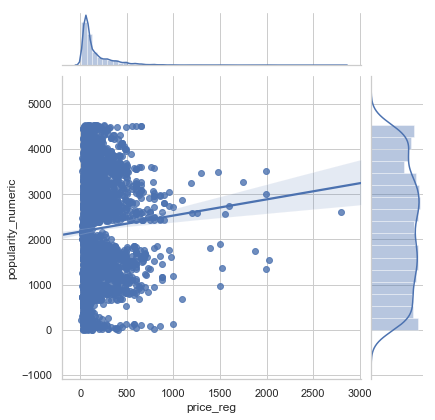

In [2718]:
ax = sns.jointplot(x=dt.price_reg, y=dt.popularity_numeric, kind='reg')


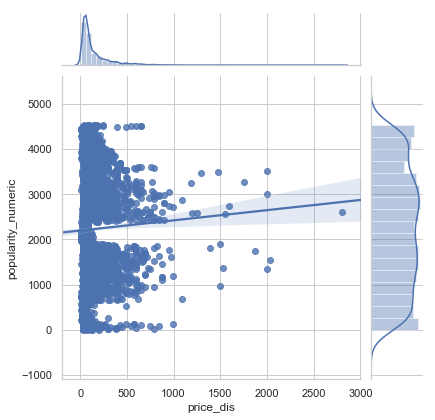

In [2719]:
sns.jointplot(x=dt.price_dis, y=dt.popularity_numeric, kind='reg')

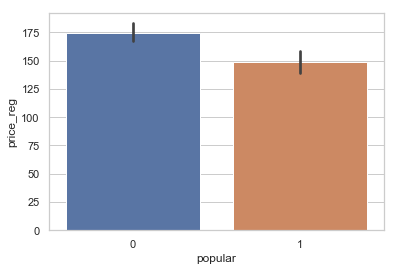

In [2720]:
ax = sns.barplot(x=dt.popular, y=dt.price_reg)

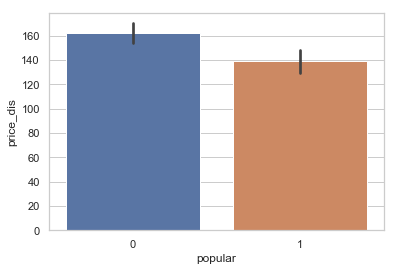

In [2721]:
ax = sns.barplot(x=dt.popular, y=dt.price_dis)

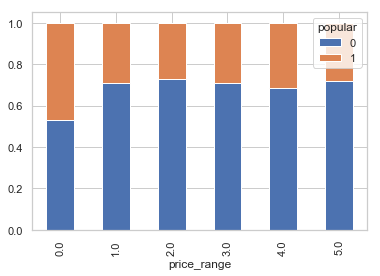

In [2722]:
table = pd.crosstab(dt.price_range, dt.popular)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
fig = plt.gcf()

# price seems to be meaningful.

<Figure size 1080x720 with 0 Axes>

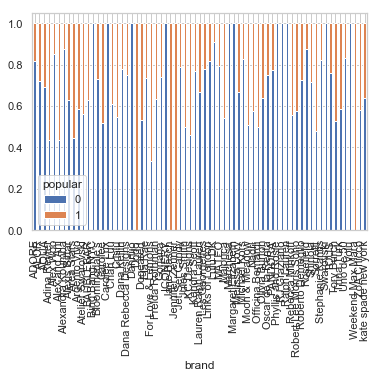

In [2723]:
plt.figure(figsize=(15,10))
table = pd.crosstab(dt.brand, dt.popular)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()

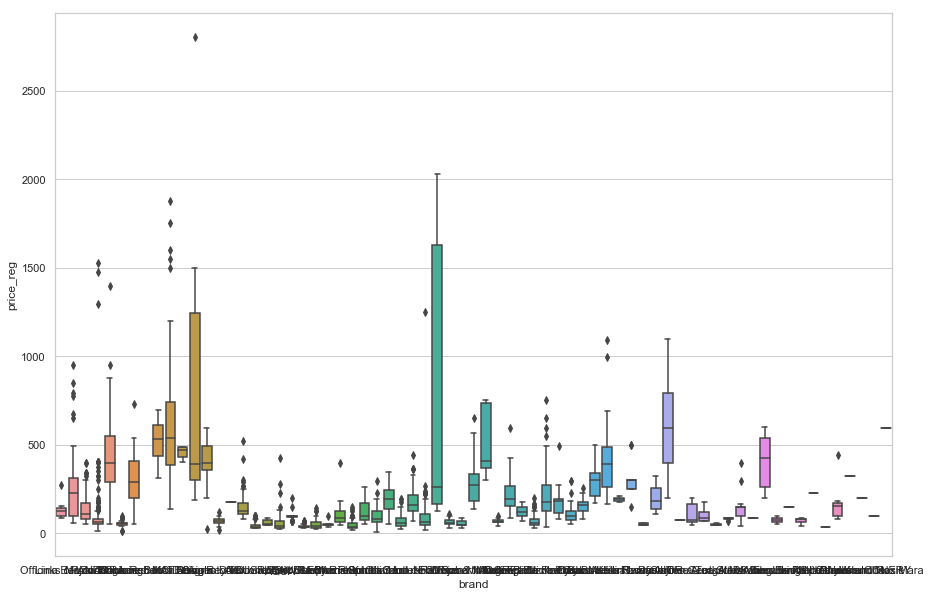

In [2724]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x=dt.brand, y=dt.price_reg)

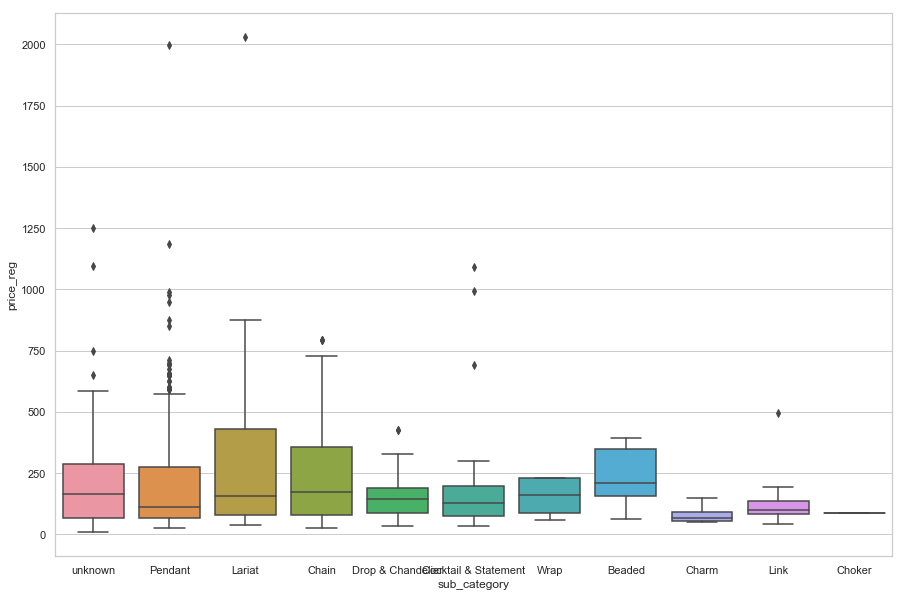

In [2725]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x=dt[dt.category=='Necklaces'].sub_category, y=dt.price_reg)

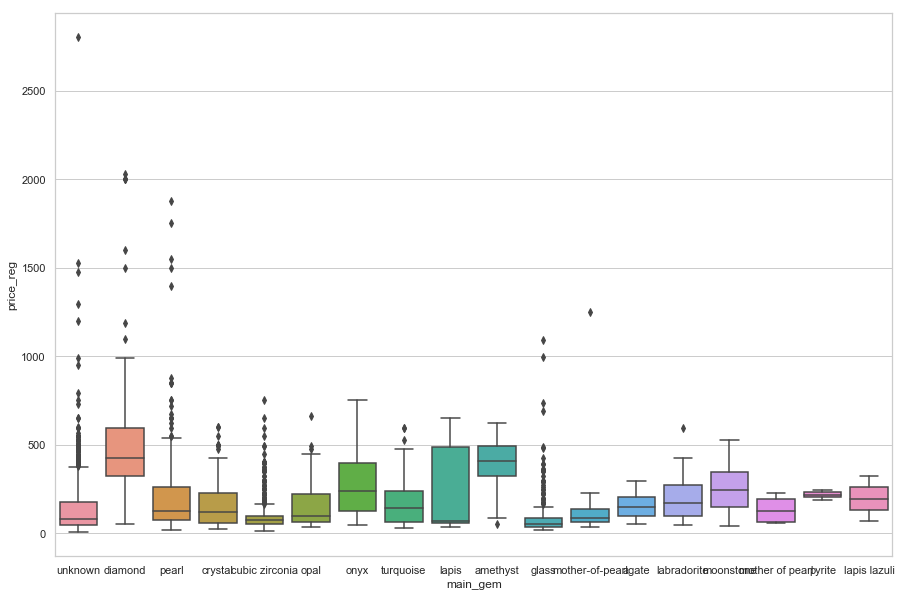

In [2726]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x=dt.main_gem, y=dt.price_reg)

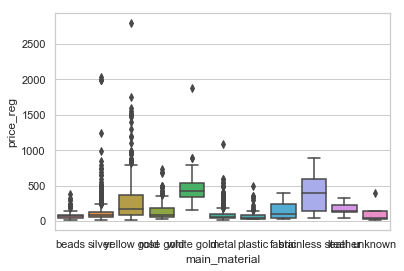

In [2727]:

ax = sns.boxplot(x=dt.main_material, y=dt.price_reg)

In [2728]:
# prices imputation : 807 items don't have prices
dt[dt.price_reg.isna() == True].shape

(807, 38)

In [2729]:
dt[['brand', 'category', 'sub_category', 'index']][dt.price_reg.isna() == True]\
.groupby(['brand', 'category', 'sub_category']).count()

index
brand               category  sub_category                 
ADORE               Bracelets Bangle & Cuff               1
                              Charm                       1
                    Earrings  Drop & Chandelier           2
                              Hoop                        2
                              Jacket, Climber & Cuff      1
                              Stud                        4
                    Necklaces Lariat                      2
                              Pendant                     3
ALOR                Bracelets Bangle & Cuff              12
                    Earrings  Hoop                        1
                    Necklaces unknown                     1
                    Rings     Cocktail & Statement        5
AQUA                Bracelets Beaded                      1
                              Charm                       1
                              Link                        1
                              unknown                     1
                    Earrings  Drop & Chandelier          28
                              Hoop                       14
                              Stud                       13
                    Necklaces Chain                       4
                              Lariat                      1
                              Pendant                    22
                              unknown                     2
Alex Woo            Necklaces Pendant                     3
Alex and Ani        Bracelets Bangle & Cuff              49
                              Beaded                      1
                              Charm                      27
                              Link                        4
                              Wrap                        1
                    Earrings  Stud                        3
                    Necklaces Chain                       1
                              Pendant                     3
                    Rings     Cocktail & Statement        1
Alexis Bittar       Bracelets Bangle & Cuff               7
                    Earrings  Drop & Chandelier           8
                              Stud                        1
                    Necklaces Pendant                     1
                    Pin       unknown                     1
Area Stars          Earrings  Drop & Chandelier           1
Argento Vivo        Anklet    unknown                     2
                    Bracelets Bangle & Cuff               1
                              Charm                       1
                              Link                        1
                    Earrings  Drop & Chandelier           6
                              Hoop                       14
                              Stud                        5
                    Necklaces Chain                       2
                              Pendant                     6
                              unknown                     3
Atelier Swarovski   Bracelets Bangle & Cuff               1
                    Earrings  Hoop                        2
                    Rings     Band                        1
BAUBLEBAR           Earrings  Drop & Chandelier          27
                              Hoop                       13
                    Necklaces Cocktail & Statement        3
                              Lariat                      2
                              Pendant                     1
                              unknown                     1
Bloomingdale's      Bracelets unknown                     1
                    Earrings  Hoop                        1
Carolee             Earrings  Drop & Chandelier           1
Chan Luu            Anklet    Wrap                        1
                    Bracelets Bangle & Cuff               2
                              Beaded                      6
                              Wrap                        7
                              unkn

In [2730]:
temp = dt[['brand', 'category', 'sub_category', 'price_reg', 'price_dis']].groupby(['brand', 'category', 'sub_category'])[['price_reg']].median().reset_index()
temp.rename(index=str, columns={'price_reg': 'median_price'}, inplace=True)
temp

brand   category            sub_category  median_price
0                     ADORE  Bracelets           Bangle & Cuff         99.00
1                     ADORE  Bracelets                   Charm         59.00
2                     ADORE  Bracelets                 unknown         69.00
3                     ADORE   Earrings       Drop & Chandelier         64.00
4                     ADORE   Earrings                    Hoop         89.00
5                     ADORE   Earrings  Jacket, Climber & Cuff         59.00
6                     ADORE   Earrings                    Stud           NaN
7                     ADORE  Necklaces                  Lariat         64.00
8                     ADORE  Necklaces                 Pendant         64.00
9                      ALOR  Bracelets           Bangle & Cuff        595.00
10                     ALOR   Earrings       Drop & Chandelier        495.00
11                     ALOR   Earrings                    Hoop        672.50
12                     ALOR  Necklaces                   Chain        795.00
13                     ALOR  Necklaces                 Pendant        595.00
14                     ALOR  Necklaces                 unknown        872.50
15                     ALOR      Rings                    Band        650.00
16                     ALOR      Rings    Cocktail & Statement        550.00
17                     AQUA  Bracelets           Bangle & Cuff         36.00
18                     AQUA  Bracelets                  Beaded         54.00
19                     AQUA  Bracelets                   Charm           NaN
20                     AQUA  Bracelets                    Link           NaN
21                     AQUA  Bracelets       Stackables & Sets         36.00
22                     AQUA  Bracelets                 unknown           NaN
23                     AQUA   Earrings       Drop & Chandelier         32.00
24                     AQUA   Earrings                    Hoop         58.00
25                     AQUA   Earrings                    Stud         48.00
26                     AQUA  Necklaces                  Beaded        228.00
27                     AQUA  Necklaces                   Chain         87.00
28                     AQUA  Necklaces    Cocktail & Statement         42.00
29                     AQUA  Necklaces       Drop & Chandelier        229.50
30                     AQUA  Necklaces                  Lariat         38.00
31                     AQUA  Necklaces                    Link         42.00
32                     AQUA  Necklaces                 Pendant         72.00
33                     AQUA  Necklaces                 unknown         42.00
34             Adina Reyter   Earrings                    Hoop        495.00
35             Adina Reyter   Earrings  Jacket, Climber & Cuff        245.00
36             Adina Reyter   Earrings                    Stud        396.50
37             Adina Reyter  Necklaces                  Lariat        575.00
38             Adina Reyter  Necklaces                 Pendant        398.00
39             Adina Reyter  Necklaces                 unknown         22.00
40             Adina Reyter      Rings                    Band        398.00
41             Adina Reyter      Rings       Stackables & Sets        398.00
42                 Alex Woo  Necklaces                   Chain         40.00
43                 Alex Woo  Necklaces                 Pendant        148.00
44             Alex and Ani  Bracelets           Bangle & Cuff         38.00
45             Alex and Ani  Bracelets                  Beaded           NaN
46             Alex and Ani  Bracelets                   Charm         28.00
47             Alex and Ani  Bracelets                    Link           NaN
48             Alex and Ani  Bracelets                    Wrap         28.00
49             Alex and Ani   Earrings                    Stud           NaN
50             Alex and Ani  Necklaces                   Chain           NaN
51             Ale

In [2731]:
for index, row in temp.iterrows():
    dt['price_reg'].loc[(dt.price_reg.isna() == True) & (dt.brand == row.brand) & (dt.category == row.category) \
                        & (dt.sub_category == row.sub_category) &(dt.sub_category==row.sub_category)] = row.median_price
    
    #dt.rename(index=str, columns={"drop": "drop_category", "anklet":"anklet_category"}, inplace=True) 

C:\Users\Soomin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [2732]:
dt[dt.price_reg.isna() == True].shape

(92, 38)

In [2733]:
# For the remainings, the brand's category mean
temp = dt[['brand', 'category', 'price_reg', 'price_dis']].groupby(['brand', 'category'])[['price_reg']].median().reset_index()
temp.rename(index=str, columns={'price_reg': 'median_price'}, inplace=True)

for index, row in temp.iterrows():
    dt['price_reg'].loc[(dt.price_reg.isna() == True) & (dt.brand == row.brand) & (dt.category == row.category)] = row.median_price

C:\Users\Soomin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [2734]:
dt[dt.price_reg.isna() == True].shape

(18, 38)

In [2735]:
# For the remainings, the main gem mean
temp = dt[['category', 'sub_category', 'main_gem', 'price_reg', 'price_dis']].groupby(['category', 'sub_category', 'main_gem',])\
[['price_reg']].median().reset_index()
temp.rename(index=str, columns={'price_reg': 'median_price'}, inplace=True)

for index, row in temp.iterrows():
    dt['price_reg'].loc[(dt.price_reg.isna() == True) & (dt.main_gem == row.main_gem) & (dt.category == row.category) & (dt.sub_category == row.sub_category)] = row.median_price

C:\Users\Soomin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [2736]:
dt[dt.price_reg.isna() == True].shape

(8, 38)

In [2737]:
# For the remainings, the main material mean
temp = dt[['category', 'sub_category', 'main_material', 'price_reg', 'price_dis']].groupby(['category', 'sub_category', 'main_material',])\
[['price_reg']].median().reset_index()
temp.rename(index=str, columns={'price_reg': 'median_price'}, inplace=True)

for index, row in temp.iterrows():
    dt['price_reg'].loc[(dt.price_reg.isna() == True) & (dt.main_material == row.main_material) & (dt.category == row.category) & (dt.sub_category == row.sub_category)] = row.median_price

C:\Users\Soomin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [2738]:
# For the remainings, the main material mean
temp = dt[['sub_category','price_reg', 'price_dis']].groupby(['sub_category'])\
[['price_reg']].median().reset_index()
temp.rename(index=str, columns={'price_reg': 'median_price'}, inplace=True)

for index, row in temp.iterrows():
    dt['price_reg'].loc[(dt.price_reg.isna() == True) & (dt.sub_category == row.sub_category)] = row.median_price

C:\Users\Soomin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [2739]:
dt[dt.price_reg.isna() == True].shape

(0, 38)

In [2740]:
dt.price_dis.loc[dt.price_dis.isna()==True] = dt.price_reg.loc[dt.price_dis.isna()==True]

C:\Users\Soomin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [2741]:
dt[dt.price_dis.isna() == True].shape

(0, 38)

### 2. discount

In [2742]:
dt.discount = (dt.price_dis < dt.price_reg).astype(int)

In [2743]:
dt.discount.value_counts()

0    4014
1     512
Name: discount, dtype: int64

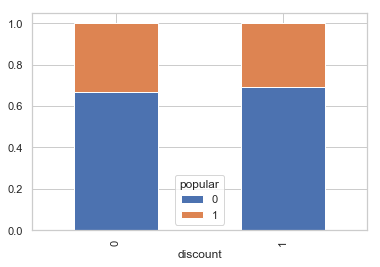

In [2744]:
table = pd.crosstab(dt.discount, dt.popular)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
fig = plt.gcf()

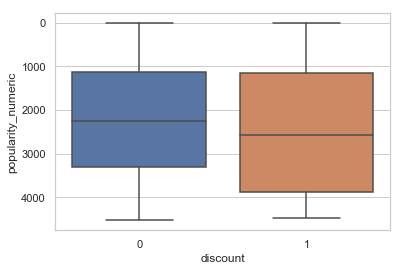

In [2745]:
plt.figure()
ax = sns.boxplot(x=dt.discount, y=dt.popularity_numeric)
ax.invert_yaxis()
# Discount seems to be meaningful: The less popular items tend to be discounted.

In [2801]:
# discount rate

dt['dis_rate'] = (dt.price_reg - dt.price_dis)/dt.price_reg
dt.dis_rate

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
5       0.00
6       0.00
7       0.00
8       0.00
9       0.00
10      0.00
11      0.00
12      0.00
13      0.00
14      0.00
15      0.00
16      0.00
17      0.00
18      0.00
19      0.00
20      0.00
21      0.00
22      0.00
23      0.00
24      0.00
25      0.00
26      0.00
27      0.00
28      0.00
29      0.00
30      0.00
31      0.00
32      0.00
33      0.00
34      0.50
35      0.50
36      0.50
37      0.50
38      0.00
39      0.00
40      0.50
41      0.50
42      0.50
43      0.50
44      0.50
45      0.00
46      0.50
47      0.00
48      0.00
49      0.00
50      0.50
51      0.50
52      0.00
53      0.00
54      0.00
55      0.50
56      0.00
57      0.50
58      0.50
59      0.50
60      0.50
61      0.50
62      0.50
63      0.00
64      0.50
65      0.50
66      0.50
67      0.00
68      0.00
69      0.00
70      0.00
71      0.00
72      0.64
73      0.00
74      0.00
75      0.50
76      0.50

In [2747]:
# Price range : 0-50:1; 50-100:2; 100-200: 3; 200-300: 4; 300-500: 5; 500+: 6
def price_range(price):
    if price > 500:
        return 6
    elif price > 300:
        return 5
    elif price > 200:
        return 4
    elif price > 100:
        return 3
    elif price > 50:
        return 2
    else:
        return 1

dt.price_range = dt.price_reg.map(lambda x: price_range(x))

### 3. Category

In [2748]:
dt['category'] = dt.category.str.lower()
dt.category.value_counts()

earrings     1710
bracelets    1409
necklaces    1118
rings         272
anklet         10
pin             5
cufflink        2
Name: category, dtype: int64

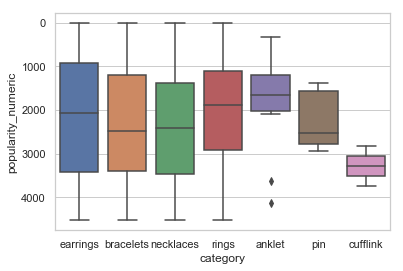

In [2749]:
plt.figure()
ax = sns.boxplot(x=dt.category, y=dt.popularity_numeric)
ax.invert_yaxis()
# Anklets are pretty popular (because it's summer?)

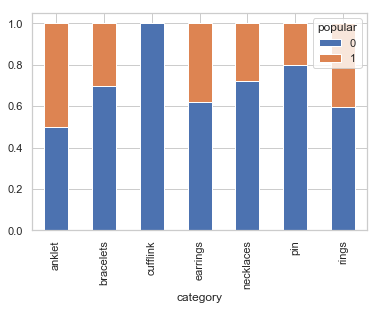

In [2750]:
table = pd.crosstab(dt.category, dt.popular)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
fig = plt.gcf()

In [2751]:
dt.category = dt.category.map(lambda x: re.sub("cufflinks", "cufflink", x))

In [2752]:
dt.category.unique()

array(['earrings', 'bracelets', 'necklaces', 'rings', 'anklet', 'pin',
       'cufflink'], dtype=object)

In [2753]:
temp = dt['category'].str.split(" ").str.join('|').str.get_dummies()
temp = temp.add_prefix('category_') 
temp.head()

category_anklet  category_bracelets  category_cufflink  category_earrings  \
0                0                   0                  0                  1   
1                0                   0                  0                  1   
2                0                   1                  0                  0   
3                0                   1                  0                  0   
4                0                   0                  0                  1   

   category_necklaces  category_pin  category_rings  
0                   0             0               0  
1                   0             0               0  
2                   0             0               0  
3                   0             0               0  
4                   0             0               0

In [2754]:
dt = dt.join(temp)
dt.head(2)

index  popularity_numeric  popular  \
0      0                2543        0   
1      1                4342        0   

                                   prod_name              brand  price_dis  \
0  "moon" bead tricolor medium hoop earrings  Officina Bernardi      120.0   
1      "moon" oval bead medium hoop earrings  Officina Bernardi      130.0   

   price_reg  price_range  discount  category sub_category  show_3  \
0      120.0            3         0  earrings         Hoop       1   
1      130.0            3         0  earrings         Hoop       1   

              shape  length main_material main_gem gold_quality diamonds_ct  \
0   ['set', 'moon']    2.25         beads  unknown          18k           0   
1  ['moon', 'oval']    1.25         beads  unknown      unknown           0   

   width  diameter  pendant_gems_size  currcolor_black  currcolor_blue  \
0    NaN      2.25                NaN                0               0   
1    NaN      1.25                NaN                0               0   

   currcolor_brown  currcolor_clear  currcolor_gold  currcolor_green  \
0                0                0               0                0   
1                0                0               0                0   

   currcolor_grey  currcolor_multi  currcolor_orange  currcolor_pink  \
0               0                1                 0               0   
1               0                0                 0               0   

   currcolor_purple  currcolor_red  currcolor_rose  currcolor_silver  \
0                 0              0               0                 0   
1                 0              0               0                 1   

   currcolor_silver.  currcolor_white  currcolor_yellow  category_anklet  \
0                  0                0                 0                0   
1                  0                0                 0                0   

   category_bracelets  category_cufflink  category_earrings  \
0                   0                  0                  1   
1                   0                  0                  1   

   category_necklaces  category_pin  category_rings  
0                   0             0               0  
1                   0             0               0

### 4. Sub-category

In [2755]:
dt['sub_category'] = dt.sub_category.str.lower()
dt.sub_category.value_counts()

drop & chandelier         826
charm                     675
pendant                   604
bangle & cuff             427
stud                      419
hoop                      369
unknown                   228
cocktail & statement      190
chain                     149
beaded                    117
lariat                    114
band                      102
link                       76
stackables & sets          59
clip on                    53
wrap                       48
jacket, climber & cuff     47
tennis                     21
anklet                      1
choker                      1
Name: sub_category, dtype: int64

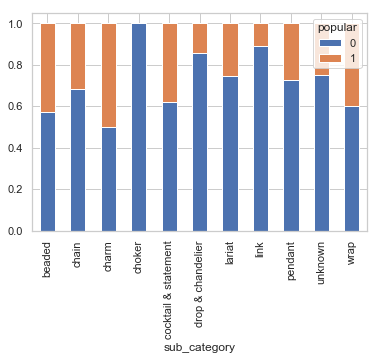

In [2756]:
table = pd.crosstab(dt[dt.category=='necklaces'].sub_category, dt.popular)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
fig = plt.gcf()
# Charm and beaded necklaces are popular

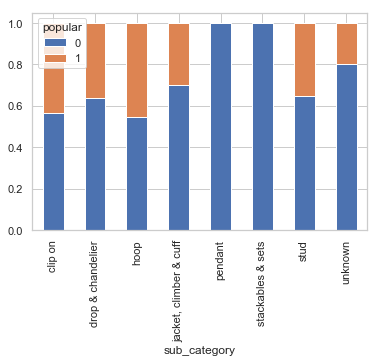

In [2757]:
table = pd.crosstab(dt[dt.category=='earrings'].sub_category, dt.popular)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
fig = plt.gcf()
# Hoop earrings and clip on are popular

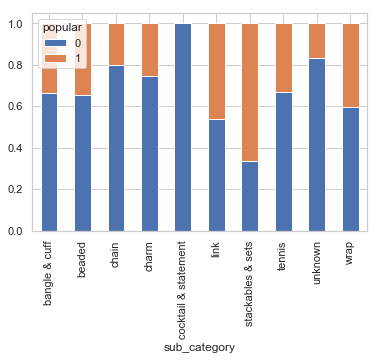

In [2758]:
table = pd.crosstab(dt[dt.category=='bracelets'].sub_category, dt.popular)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
fig = plt.gcf()
#Stackables & sets bracelets are very popular (multi sets)

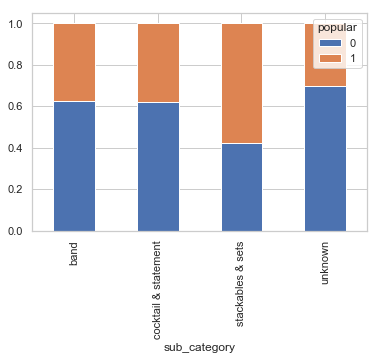

In [2759]:
table = pd.crosstab(dt[dt.category=='rings'].sub_category, dt.popular)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
fig = plt.gcf()
#Stackables & sets rings are also popular (multi sets)

In [2760]:
dt['sub_category'].str.split(", ").str.join('|').str.get_dummies().head()

anklet  band  bangle & cuff  beaded  chain  charm  choker  climber & cuff  \
0       0     0              0       0      0      0       0               0   
1       0     0              0       0      0      0       0               0   
2       0     0              0       0      0      1       0               0   
3       0     0              0       1      0      0       0               0   
4       0     0              0       0      0      0       0               0   

   clip on  cocktail & statement  drop & chandelier  hoop  jacket  lariat  \
0        0                     0                  0     1       0       0   
1        0                     0                  0     1       0       0   
2        0                     0                  0     0       0       0   
3        0                     0                  0     0       0       0   
4        0                     0                  1     0       0       0   

   link  pendant  stackables & sets  stud  tennis  unknown  wrap  
0     0        0                  0     0       0        0     0  
1     0        0                  0     0       0        0     0  
2     0        0                  0     0       0        0     0  
3     0        0                  0     0       0        0     0  
4     0        0                  0     0       0        0     0

In [2761]:
#dt.rename(index=str, columns={"drop": "drop_category", "anklet":"anklet_category"}, inplace=True) 
# there are duplicated columns ('drop, 'anklet') from Category. So I changed the name of the columns

In [2762]:
temp = dt['sub_category'].str.split(", ").str.join('|').str.get_dummies()
temp = temp.add_prefix('sub_category_') 
temp.head()

sub_category_anklet  sub_category_band  sub_category_bangle & cuff  \
0                    0                  0                           0   
1                    0                  0                           0   
2                    0                  0                           0   
3                    0                  0                           0   
4                    0                  0                           0   

   sub_category_beaded  sub_category_chain  sub_category_charm  \
0                    0                   0                   0   
1                    0                   0                   0   
2                    0                   0                   1   
3                    1                   0                   0   
4                    0                   0                   0   

   sub_category_choker  sub_category_climber & cuff  sub_category_clip on  \
0                    0                            0                     0   
1                    0                            0                     0   
2                    0                            0                     0   
3                    0                            0                     0   
4                    0                            0                     0   

   sub_category_cocktail & statement  sub_category_drop & chandelier  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               1   

   sub_category_hoop  sub_category_jacket  sub_category_lariat  \
0                  1                    0                    0   
1                  1                    0                    0   
2                  0                    0                    0   
3                  0                    0                    0   
4                  0                    0                    0   

   sub_category_link  sub_category_pendant  sub_category_stackables & sets  \
0                  0                     0                               0   
1                  0                     0                               0   
2                  0                     0                               0   
3                  0                     0                               0   
4                  0                     0                               0   

   sub_category_stud  sub_category_tennis  sub_category_unknown  \
0                  0                    0                     0   
1                  0                    0                     0   
2                  0                    0                     0   
3                  0                    0                     0   
4                  0                    0                     0   

   sub_category_wrap  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [2763]:
dt = dt.join(temp)
dt.head(1)

index  popularity_numeric  popular  \
0      0                2543        0   

                                   prod_name              brand  price_dis  \
0  "moon" bead tricolor medium hoop earrings  Officina Bernardi      120.0   

   price_reg  price_range  discount  category sub_category  show_3  \
0      120.0            3         0  earrings         hoop       1   

             shape  length main_material main_gem gold_quality diamonds_ct  \
0  ['set', 'moon']    2.25         beads  unknown          18k           0   

   width  diameter  pendant_gems_size  currcolor_black  currcolor_blue  \
0    NaN      2.25                NaN                0               0   

   currcolor_brown  currcolor_clear  currcolor_gold  currcolor_green  \
0                0                0               0                0   

   currcolor_grey  currcolor_multi  currcolor_orange  currcolor_pink  \
0               0                1                 0               0   

   currcolor_purple  currcolor_red  currcolor_rose  currcolor_silver  \
0                 0              0               0                 0   

   currcolor_silver.  currcolor_white  currcolor_yellow  category_anklet  \
0                  0                0                 0                0   

   category_bracelets  category_cufflink  category_earrings  \
0                   0                  0                  1   

   category_necklaces  category_pin  category_rings  sub_category_anklet  \
0                   0             0               0                    0   

   sub_category_band  sub_category_bangle & cuff  sub_category_beaded  \
0                  0                           0                    0   

   sub_category_chain  sub_category_charm  sub_category_choker  \
0                   0                   0                    0   

   sub_category_climber & cuff  sub_category_clip on  \
0                            0                     0   

   sub_category_cocktail & statement  sub_category_drop & chandelier  \
0                                  0                               0   

   sub_category_hoop  sub_category_jacket  sub_category_lariat  \
0                  1                    0                    0   

   sub_category_link  sub_category_pendant  sub_category_stackables & sets  \
0                  0                     0                               0   

   sub_category_stud  sub_category_tennis  sub_category_unknown  \
0                  0                    0                     0   

   sub_category_wrap  
0                  0

### 5. Shape

In [2764]:
dt['shape'].value_counts()

['unknown']                                     2532
['drop']                                         938
['heart']                                        170
['set']                                          137
['box']                                           45
['star']                                          36
['stretch']                                       36
['button']                                        34
['wrap']                                          30
['drop', 'teardrop']                              29
['round']                                         21
['chandelier']                                    21
['strand']                                        21
['drop', 'heart']                                 20
['choker']                                        20
['teardrop']                                      19
['thread']                                        16
['layered', 'drop']                               16
['layered']                                   

In [2765]:
temp = dt['shape'].map(lambda x: re.sub(r"\s*,\s*", ",", str(x).replace("'", "").replace("[", "").replace("]", "")))
temp

0                       set,moon
1                      moon,oval
2                           moon
3                        unknown
4                     omega,drop
5                        unknown
6                        unknown
7                           drop
8                        unknown
9                         floral
10                       unknown
11                   drop,floral
12                       unknown
13                       unknown
14                       unknown
15                       unknown
16                       unknown
17                       unknown
18                       unknown
19                           set
20                       unknown
21                     round,set
22                       unknown
23                       unknown
24                       unknown
25                       unknown
26                       unknown
27                      princess
28                      princess
29                       unknown
30        

In [2766]:
temp = temp.str.split(",").str.join('|').str.get_dummies()
temp = temp.add_prefix('shape_') 
temp.head()

shape_baguette  shape_bib  shape_box  shape_button  shape_chandelier  \
0               0          0          0             0                 0   
1               0          0          0             0                 0   
2               0          0          0             0                 0   
3               0          0          0             0                 0   
4               0          0          0             0                 0   

   shape_channel  shape_choker  shape_collar  shape_colored  shape_conch  \
0              0             0             0              0            0   
1              0             0             0              0            0   
2              0             0             0              0            0   
3              0             0             0              0            0   
4              0             0             0              0            0   

   shape_curve  shape_cushion  shape_drop  shape_emerald  shape_flag  \
0            0              0           0              0           0   
1            0              0           0              0           0   
2            0              0           0              0           0   
3            0              0           0              0           0   
4            0              0           1              0           0   

   shape_floral  shape_heart  shape_helix  shape_layer  shape_layered  \
0             0            0            0            0              0   
1             0            0            0            0              0   
2             0            0            0            0              0   
3             0            0            0            0              0   
4             0            0            0            0              0   

   shape_lobe  shape_marquise  shape_miracle  shape_moon  shape_nautical  \
0           0               0              0           1               0   
1           0               0              0           1               0   
2           0               0              0           1               0   
3           0               0              0           0               0   
4           0               0              0           0               0   

   shape_omega  shape_oval  shape_pave  shape_pear  shape_princess  \
0            0           0           0           0               0   
1            0           1           0           0               0   
2            0           0           0           0               0   
3            0           0           0           0               0   
4            1           0           0           0               0   

   shape_prong  shape_rectangular  shape_rope  shape_round  shape_set  \
0            0                  0           0            0          1   
1            0                  0           0            0          0   
2            0                  0           0            0          0   
3            0                  0           0            0          0   
4            0                  0           0            0          0   

   shape_snake  shape_sports  shape_square  shape_star  shape_strand  \
0            0             0             0           0             0   
1            0             0             0           0             0   
2            0             0             0           0             0   
3            0             0             0           0             0   
4            0             0             0           0             0   

   shape_stretch  shape_sun  shape_teardrop  shape_thread  shape_trillion  \
0              0          0               0             0               0   
1              0          0               0             0               0   
2              0          0               0             0               0   
3              0          0               0             0               0   
4              0          0               0             0               0   

   shape_u

In [2767]:
dt = dt.join(temp)
dt.head(1)

index  popularity_numeric  popular  \
0      0                2543        0   

                                   prod_name              brand  price_dis  \
0  "moon" bead tricolor medium hoop earrings  Officina Bernardi      120.0   

   price_reg  price_range  discount  category sub_category  show_3  \
0      120.0            3         0  earrings         hoop       1   

             shape  length main_material main_gem gold_quality diamonds_ct  \
0  ['set', 'moon']    2.25         beads  unknown          18k           0   

   width  diameter  pendant_gems_size  currcolor_black  currcolor_blue  \
0    NaN      2.25                NaN                0               0   

   currcolor_brown  currcolor_clear  currcolor_gold  currcolor_green  \
0                0                0               0                0   

   currcolor_grey  currcolor_multi  currcolor_orange  currcolor_pink  \
0               0                1                 0               0   

   currcolor_purple  currcolor_red  currcolor_rose  currcolor_silver  \
0                 0              0               0                 0   

   currcolor_silver.  currcolor_white  currcolor_yellow  category_anklet  \
0                  0                0                 0                0   

   category_bracelets  category_cufflink  category_earrings  \
0                   0                  0                  1   

   category_necklaces  category_pin  category_rings  sub_category_anklet  \
0                   0             0               0                    0   

   sub_category_band  sub_category_bangle & cuff  sub_category_beaded  \
0                  0                           0                    0   

   sub_category_chain  sub_category_charm  sub_category_choker  \
0                   0                   0                    0   

   sub_category_climber & cuff  sub_category_clip on  \
0                            0                     0   

   sub_category_cocktail & statement  sub_category_drop & chandelier  \
0                                  0                               0   

   sub_category_hoop  sub_category_jacket  sub_category_lariat  \
0                  1                    0                    0   

   sub_category_link  sub_category_pendant  sub_category_stackables & sets  \
0                  0                     0                               0   

   sub_category_stud  sub_category_tennis  sub_category_unknown  \
0                  0                    0                     0   

   sub_category_wrap  shape_baguette  shape_bib  shape_box  shape_button  \
0                  0               0          0          0             0   

   shape_chandelier  shape_channel  shape_choker  shape_collar  shape_colored  \
0                 0              0             0             0              0   

   shape_conch  shape_curve  shape_cushion  shape_drop  shape_emerald  \
0            0            0              0           0              0   

   shape_flag  shape_floral  shape_heart  shape_helix  shape_layer  \
0           0             0            0            0            0   

   shape_layered  shape_lobe  shape_marquise  shape_miracle  shape_moon  \
0              0           0               0              0           1   

   shape_nautical  shape_omega  shape_oval  shape_pave  shape_pear  \
0               0            0           0           0           0   

   shape_princess  shape_prong  shape_rectangular  shape_rope  shape_round  \
0               0            0                  0           0            0   

   shape_set  shape_snake  shape_sports  shape_square  shape_star  \
0          1            0             0             0           0   

   shape_strand  shape_stretch  shape_sun  shape_teardrop  shape_thread  \
0             0              0          0               0             0   

   shape_trillion  shape_unknown  shape_wrap  
0               0              0           0

### 6. Main material

In [2768]:
dt.main_material.value_counts()

yellow gold        1612
silver             1443
metal               864
rose gold           188
plastic             141
beads               123
fabric               57
stainless steel      44
white gold           33
leather              14
unknown               7
Name: main_material, dtype: int64

In [2769]:
dt[dt.main_material == 'unknown']

index  popularity_numeric  popular  \
1150   1150                 647        1   
2190   2190                 225        1   
3349   3349                 170        1   
4095   4095                1585        0   
4098   4098                 342        1   
4099   4099                 341        1   
4474   4474                 899        1   

                                                          prod_name  \
1150                                   cubic zirconia stud earrings   
2190                        lobe wonder???? earring support patches   
3349                                  simulated pearl stud earrings   
4095                                           strand necklace, 72"   
4098                                               stretch bracelet   
4099                                               stretch bracelet   
4474  women's 8mm round white simulated pearl endless necklace, 60"   

             brand  price_dis  price_reg  price_range  discount   category  \
1150       Carolee       30.0       30.0            1         0   earrings   
2190  Kendra Scott       10.0       10.0            1         0   earrings   
3349      Majorica       82.5       82.5            2         0   earrings   
4095       Carolee       65.0       65.0            2         0  necklaces   
4098      Chan Luu       75.0       75.0            2         0  bracelets   
4099      Chan Luu      145.0      145.0            3         0  bracelets   
4474      Majorica      395.0      395.0            5         0  necklaces   

           sub_category  show_3                         shape     length  \
1150               stud       1                   ['unknown']   0.393701   
2190  drop & chandelier       1                ['chandelier']   2.000000   
3349               stud       1                   ['unknown']   0.393701   
4095            unknown       1                   ['unknown']  72.000000   
4098             beaded       1                   ['unknown']   6.000000   
4099      bangle & cuff       1                   ['unknown']   6.000000   
4474             beaded       1  ['round', 'strand', 'layer']  60.000000   

     main_material        main_gem gold_quality diamonds_ct  width  diameter  \
1150       unknown  cubic zirconia      unknown           0    NaN       NaN   
2190       unknown         unknown      unknown           0    NaN       NaN   
3349       unknown           pearl      unknown           0    NaN       NaN   
4095       unknown           pearl      unknown           0    NaN       NaN   
4098       unknown           agate      unknown           0    NaN  1.909859   
4099       unknown           agate      unknown           0    NaN  1.909859   
4474       unknown           pearl      unknown           0    NaN       NaN   

      pendant_gems_size  currcolor_black  currcolor_blue  currcolor_brown  \
1150                NaN                0               0                0   
2190                NaN                0               0                0   
3349                NaN                0               0                0   
4095                NaN                0               0                0   
4098           0.590551                0               0                0   
4099           0.590551                0               0                0   
4474           0.314961                0               0                0   

      currcolor_clear  currcolor_gold  currcolor_green  currcolor_grey  \
1150                1               0                0               0   
2190                0               0                0               0   
3349                0               0                0               0   
4095                0               0                0               0   
4098                0               0                0               1   
4099                0               0                0               1   
4474                0               0                0               0   


In [2770]:
dt.drop('2190', 0, inplace=True) # it's not a jewerly.

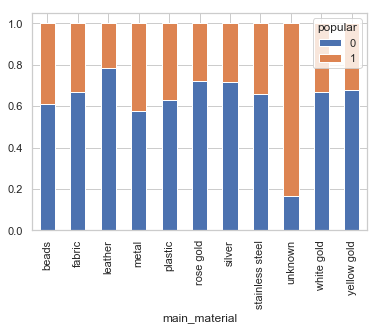

In [2771]:
table = pd.crosstab(dt.main_material, dt.popular)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
fig = plt.gcf()

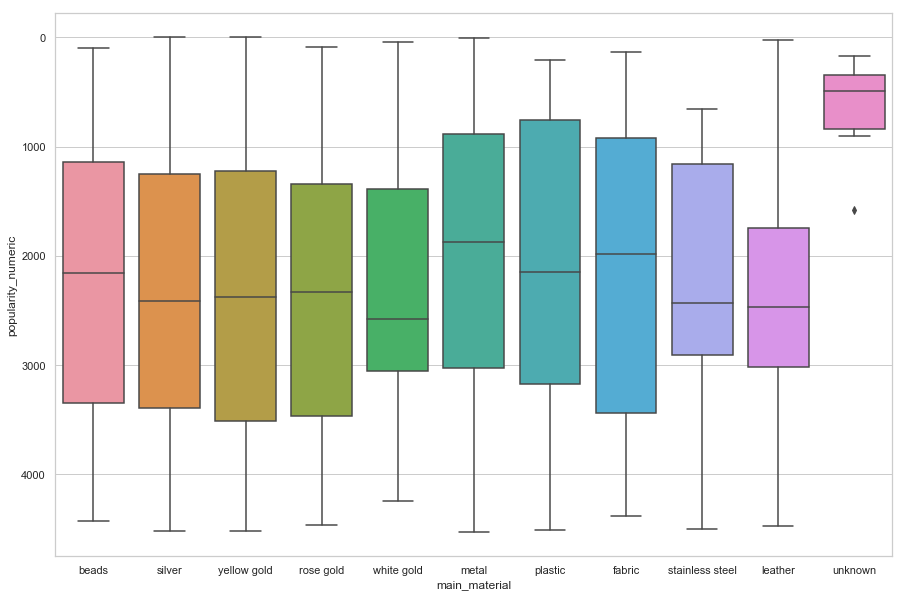

In [2772]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x=dt.main_material, y=dt.popularity_numeric)
ax.invert_yaxis()

In [2773]:
temp = dt.main_material.str.split(",").str.join('|').str.get_dummies()
temp = temp.add_prefix('main_material_') 
temp

main_material_beads  main_material_fabric  main_material_leather  \
0                       1                     0                      0   
1                       1                     0                      0   
2                       0                     0                      0   
3                       0                     0                      0   
4                       0                     0                      0   
5                       0                     0                      0   
6                       0                     0                      0   
7                       0                     0                      0   
8                       0                     0                      0   
9                       0                     0                      0   
10                      0                     0                      0   
11                      0                     0                      0   
12                      0                     0                      0   
13                      0                     0                      0   
14                      0                     0                      0   
15                      0                     0                      0   
16                      0                     0                      0   
17                      0                     0                      0   
18                      0                     0                      0   
19                      0                     0                      0   
20                      0                     0                      0   
21                      0                     0                      0   
22                      0                     0                      0   
23                      0                     0                      0   
24                      0                     0                      0   
25                      0                     0                      0   
26                      0                     0                      0   
27                      0                     0                      0   
28                      0                     0                      0   
29                      0                     0                      0   
30                      0                     0                      0   
31                      0                     0                      0   
32                      0                     0                      0   
33                      0                     0                      0   
34                      0                     0                      0   
35                      0                     0                      0   
36                      0                     0                      0   
37                      0                     0                      0   
38                      0                     0                      0   
39                      0                     0                      0   
40                      0                     0                      0   
41                      0                     0                      0   
42                      0                     0                      0   
43                      0                     0                      0   
44                      0                     0                      0   
45                      0                     0                      0   
46                      0                     0                      0   
47                      0                     0                      0   
48                      0                     0                      0   
49                      0                     0                      0   
50                      0                     0                      0   
51                      0                     0                      0   
52                      0                     0                      0   
53        

In [2774]:
dt = dt.join(temp)
dt.head(2)

index  popularity_numeric  popular  \
0      0                2543        0   
1      1                4342        0   

                                   prod_name              brand  price_dis  \
0  "moon" bead tricolor medium hoop earrings  Officina Bernardi      120.0   
1      "moon" oval bead medium hoop earrings  Officina Bernardi      130.0   

   price_reg  price_range  discount  category sub_category  show_3  \
0      120.0            3         0  earrings         hoop       1   
1      130.0            3         0  earrings         hoop       1   

              shape  length main_material main_gem gold_quality diamonds_ct  \
0   ['set', 'moon']    2.25         beads  unknown          18k           0   
1  ['moon', 'oval']    1.25         beads  unknown      unknown           0   

   width  diameter  pendant_gems_size  currcolor_black  currcolor_blue  \
0    NaN      2.25                NaN                0               0   
1    NaN      1.25                NaN                0               0   

   currcolor_brown  currcolor_clear  currcolor_gold  currcolor_green  \
0                0                0               0                0   
1                0                0               0                0   

   currcolor_grey  currcolor_multi  currcolor_orange  currcolor_pink  \
0               0                1                 0               0   
1               0                0                 0               0   

   currcolor_purple  currcolor_red  currcolor_rose  currcolor_silver  \
0                 0              0               0                 0   
1                 0              0               0                 1   

   currcolor_silver.  currcolor_white  currcolor_yellow  category_anklet  \
0                  0                0                 0                0   
1                  0                0                 0                0   

   category_bracelets  category_cufflink  category_earrings  \
0                   0                  0                  1   
1                   0                  0                  1   

   category_necklaces  category_pin  category_rings  sub_category_anklet  \
0                   0             0               0                    0   
1                   0             0               0                    0   

   sub_category_band  sub_category_bangle & cuff  sub_category_beaded  \
0                  0                           0                    0   
1                  0                           0                    0   

   sub_category_chain  sub_category_charm  sub_category_choker  \
0                   0                   0                    0   
1                   0                   0                    0   

   sub_category_climber & cuff  sub_category_clip on  \
0                            0                     0   
1                            0                     0   

   sub_category_cocktail & statement  sub_category_drop & chandelier  \
0                                  0                               0   
1                                  0                               0   

   sub_category_hoop  sub_category_jacket  sub_category_lariat  \
0                  1                    0                    0   
1                  1                    0                    0   

   sub_category_link  sub_category_pendant  sub_category_stackables & sets  \
0                  0                     0                               0   
1                  0                     0                               0   

   sub_category_stud  sub_category_tennis  sub_category_unknown  \
0                  0                    0                     0   
1                  0                    0                     0   

   sub_category_wrap  shape_baguette  shape_bib  shape_box  shape_button  \
0                  0               0          0          0             0   
1                  0               0          0          0             0   

   

In [2775]:
dt.drop('main_material_unknown', 1, inplace=True)

### 9. Main gem

In [2776]:
dt.main_gem.value_counts()

unknown            1689
cubic zirconia     1059
glass               426
pearl               363
diamond             346
crystal             315
mother-of-pearl      71
turquoise            57
labradorite          50
opal                 40
onyx                 30
amethyst             23
agate                16
moonstone            15
mother of pearl      11
lapis                 8
pyrite                4
lapis lazuli          2
Name: main_gem, dtype: int64

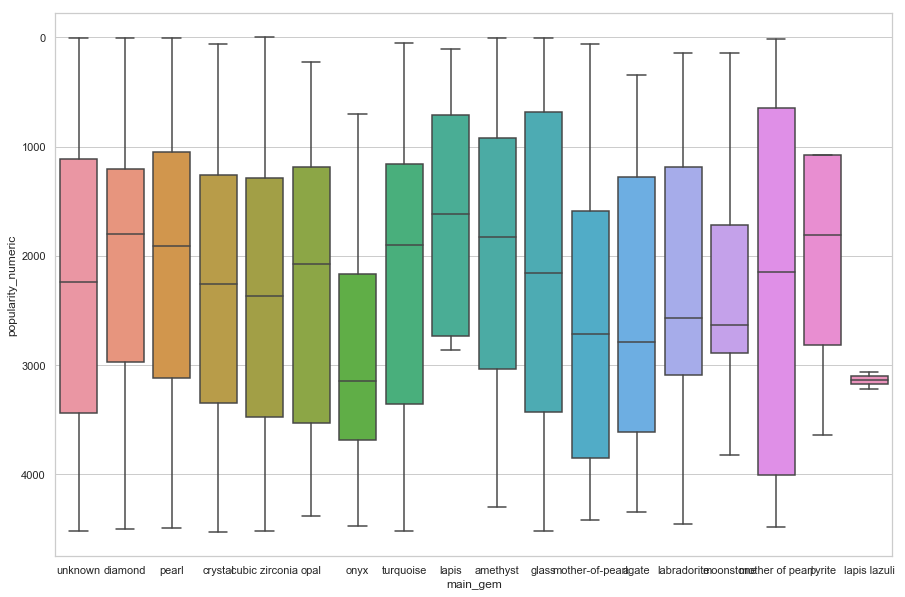

In [2777]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x=dt.main_gem, y=dt.popularity_numeric)
ax.invert_yaxis()

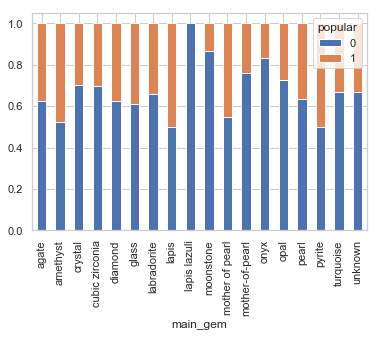

In [2778]:
table = pd.crosstab(dt.main_gem, dt.popular)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
fig = plt.gcf()

In [2779]:
dt.main_gem = dt.main_gem.map(lambda x: str(x).replace("mother of pearl", "mother-of-pearl"))
dt.main_gem = dt.main_gem.map(lambda x: str(x).replace("lapis lazuli", "lapis"))
dt.main_gem.unique()

array(['unknown', 'diamond', 'pearl', 'crystal', 'cubic zirconia', 'opal',
       'onyx', 'turquoise', 'lapis', 'amethyst', 'glass',
       'mother-of-pearl', 'agate', 'labradorite', 'moonstone', 'pyrite'],
      dtype=object)

In [2780]:
temp = dt.main_gem.str.split(",").str.join('|').str.get_dummies()
temp = temp.add_prefix('main_gem_') 
temp

main_gem_agate  main_gem_amethyst  main_gem_crystal  \
0                  0                  0                 0   
1                  0                  0                 0   
2                  0                  0                 0   
3                  0                  0                 0   
4                  0                  0                 0   
5                  0                  0                 0   
6                  0                  0                 0   
7                  0                  0                 0   
8                  0                  0                 0   
9                  0                  0                 1   
10                 0                  0                 0   
11                 0                  0                 0   
12                 0                  0                 0   
13                 0                  0                 0   
14                 0                  0                 0   
15                 0                  0                 0   
16                 0                  0                 0   
17                 0                  0                 0   
18                 0                  0                 0   
19                 0                  0                 0   
20                 0                  0                 0   
21                 0                  0                 0   
22                 0                  0                 0   
23                 0                  0                 0   
24                 0                  0                 0   
25                 0                  0                 0   
26                 0                  0                 0   
27                 0                  0                 0   
28                 0                  0                 0   
29                 0                  0                 0   
30                 0                  0                 0   
31                 0                  0                 0   
32                 0                  0                 0   
33                 0                  0                 0   
34                 0                  0                 0   
35                 0                  0                 0   
36                 0                  0                 0   
37                 0                  0                 0   
38                 0                  0                 0   
39                 0                  0                 0   
40                 0                  0                 0   
41                 0                  0                 0   
42                 0                  0                 0   
43                 0                  0                 0   
44                 0                  0                 0   
45                 0                  0                 0   
46                 0                  0                 0   
47                 0                  0                 0   
48                 0                  0                 0   
49                 0                  0                 0   
50                 0                  0                 0   
51                 0                  0                 0   
52                 0                  0                 0   
53                 0                  0                 0   
54                 0                  0                 0   
55                 0                  0                 0   
56                 0                  0                 0   
57                 0                  0                 0   
58                 0                  0                 0   
59                 0                  0                 0   
60                 0                  0                 0   
61                 0                  0                 0   
62                 0                  0                 0   
63                 0                  0                 0   
64                 0                  0  

In [2781]:
dt = dt.join(temp)
dt.head(2)

index  popularity_numeric  popular  \
0      0                2543        0   
1      1                4342        0   

                                   prod_name              brand  price_dis  \
0  "moon" bead tricolor medium hoop earrings  Officina Bernardi      120.0   
1      "moon" oval bead medium hoop earrings  Officina Bernardi      130.0   

   price_reg  price_range  discount  category sub_category  show_3  \
0      120.0            3         0  earrings         hoop       1   
1      130.0            3         0  earrings         hoop       1   

              shape  length main_material main_gem gold_quality diamonds_ct  \
0   ['set', 'moon']    2.25         beads  unknown          18k           0   
1  ['moon', 'oval']    1.25         beads  unknown      unknown           0   

   width  diameter  pendant_gems_size  currcolor_black  currcolor_blue  \
0    NaN      2.25                NaN                0               0   
1    NaN      1.25                NaN                0               0   

   currcolor_brown  currcolor_clear  currcolor_gold  currcolor_green  \
0                0                0               0                0   
1                0                0               0                0   

   currcolor_grey  currcolor_multi  currcolor_orange  currcolor_pink  \
0               0                1                 0               0   
1               0                0                 0               0   

   currcolor_purple  currcolor_red  currcolor_rose  currcolor_silver  \
0                 0              0               0                 0   
1                 0              0               0                 1   

   currcolor_silver.  currcolor_white  currcolor_yellow  category_anklet  \
0                  0                0                 0                0   
1                  0                0                 0                0   

   category_bracelets  category_cufflink  category_earrings  \
0                   0                  0                  1   
1                   0                  0                  1   

   category_necklaces  category_pin  category_rings  sub_category_anklet  \
0                   0             0               0                    0   
1                   0             0               0                    0   

   sub_category_band  sub_category_bangle & cuff  sub_category_beaded  \
0                  0                           0                    0   
1                  0                           0                    0   

   sub_category_chain  sub_category_charm  sub_category_choker  \
0                   0                   0                    0   
1                   0                   0                    0   

   sub_category_climber & cuff  sub_category_clip on  \
0                            0                     0   
1                            0                     0   

   sub_category_cocktail & statement  sub_category_drop & chandelier  \
0                                  0                               0   
1                                  0                               0   

   sub_category_hoop  sub_category_jacket  sub_category_lariat  \
0                  1                    0                    0   
1                  1                    0                    0   

   sub_category_link  sub_category_pendant  sub_category_stackables & sets  \
0                  0                     0                               0   
1                  0                     0                               0   

   sub_category_stud  sub_category_tennis  sub_category_unknown  \
0                  0                    0                     0   
1                  0                    0                     0   

   sub_category_wrap  shape_baguette  shape_bib  shape_box  shape_button  \
0                  0               0          0          0             0   
1                  0               0          0          0             0   

   

In [2782]:
dt.drop('main_gem_unknown', 1, inplace=True)

### 10. gold quality

In [2783]:
dt.gold_quality.value_counts()

unknown       2430
14k           1176
18k            700
12k             94
10k             90
24k             11
22k              4
18k, 14k         4
23k              4
18 k             3
12k, 14k         2
16k, 18k         2
14 k, 18 k       2
14 k             2
12k, 18k         1
Name: gold_quality, dtype: int64

In [2784]:
def clean_gold_quality(x):
    if x == "unknown":
        return (0.0)
    else:
        val = re.sub(r"\s*k\s*", "", str(x))
        val = re.sub(r"\s*,\s*", ",", val)
        return (max(val.split(","))) 

dt.gold_quality.map(lambda x: clean_gold_quality(x)).value_counts()

0.0    2430
14     1180
18      712
12       94
10       90
24       11
22        4
23        4
Name: gold_quality, dtype: int64

In [2785]:
dt.gold_quality = dt.gold_quality.map(lambda x: float(clean_gold_quality(x)))

In [2786]:
dt.gold_quality

0       18.0
1        0.0
2        0.0
3        0.0
4        0.0
5       18.0
6        0.0
7       18.0
8       18.0
9       14.0
10      14.0
11      14.0
12      14.0
13      14.0
14      14.0
15      14.0
16      14.0
17      14.0
18      14.0
19      14.0
20      14.0
21      14.0
22      14.0
23      14.0
24      14.0
25      14.0
26      14.0
27      14.0
28      14.0
29      14.0
30      14.0
31      14.0
32      14.0
33       0.0
34      14.0
35      14.0
36      14.0
37      14.0
38      14.0
39      14.0
40      14.0
41      14.0
42      14.0
43      14.0
44      14.0
45      14.0
46      14.0
47      14.0
48      14.0
49      14.0
50      14.0
51      14.0
52      14.0
53      14.0
54      14.0
55      14.0
56      14.0
57      14.0
58      14.0
59      14.0
60      14.0
61      14.0
62      14.0
63      14.0
64      14.0
65      14.0
66      14.0
67      14.0
68      14.0
69      14.0
70      14.0
71      14.0
72      14.0
73      14.0
74      14.0
75      14.0
76      14.0

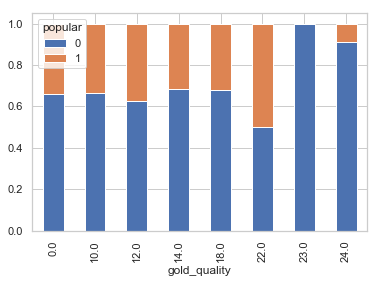

In [2787]:
table = pd.crosstab(dt.gold_quality, dt.popular)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
fig = plt.gcf()

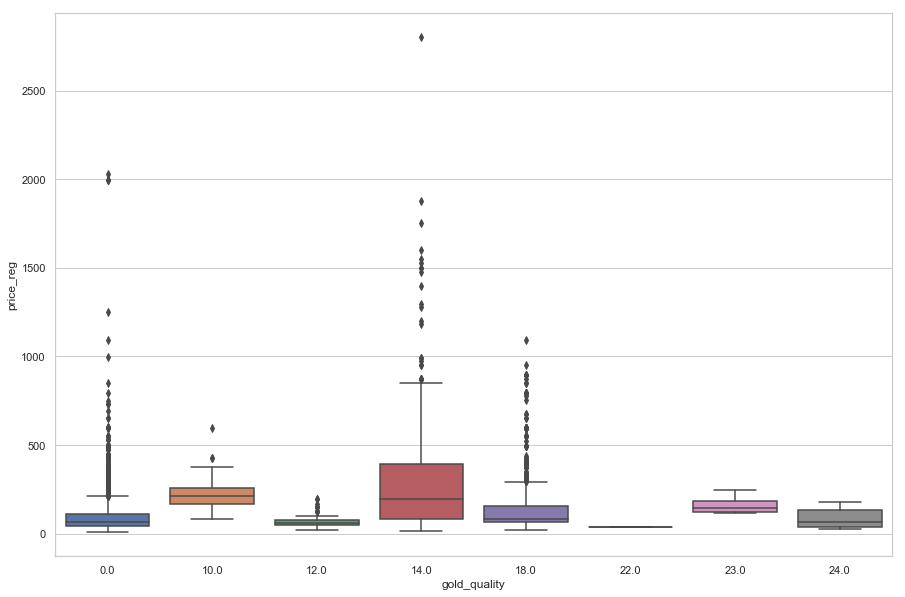

In [2788]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x=dt.gold_quality, y=dt.price_reg)

#ax.invert_yaxis()

### 12. diamonds ct

In [2789]:
dt.diamonds_ct.value_counts()

0             4207
0.1             41
0.05            32
0.06            29
0.03            21
0.02            19
0.09            17
0.12            16
0.01            16
0.04            13
0.14            11
0.15            10
0.16             7
0.11             6
0.07             6
0.13             6
0.18             5
0.08             5
0.8              5
0.5              5
0.2              4
0.9              3
0.3              3
0.6              3
0.005            2
0.5, 0.6         2
0.22             2
0.065            2
0.095            2
0.21             1
0.39, 0.7        1
0.25             1
0.72             1
0.035            1
0.48             1
0.016            1
0.039            1
0.75             1
0.105            1
0.32             1
0.64             1
0.42             1
0.134            1
0.102            1
0.27             1
0.17             1
0.408            1
0.7              1
0.19             1
0.085            1
0.05, 0.56       1
0.05, 0.06       1
0.278       

In [2790]:
dt.diamonds_ct = dt.diamonds_ct.map(lambda x: float(max(x.split(",")))) 

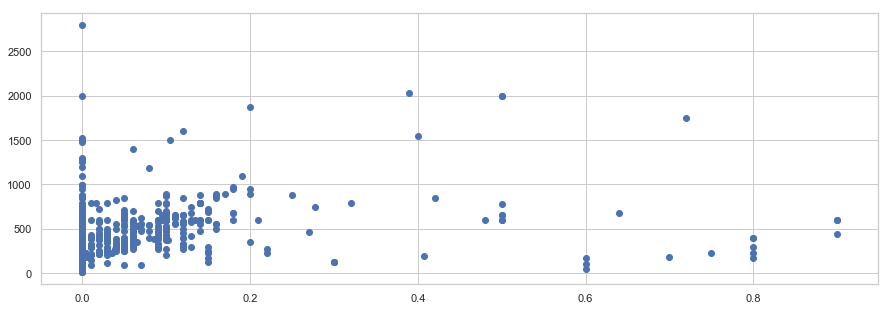

In [2791]:
plt.figure(figsize=(15,5))
plt.scatter(dt.diamonds_ct, dt.price_reg)
#ax.invert_yaxis()
# bigger carats are cheaper relatively... Starange..

### 13. Brands

In [2792]:
temp = dt.brand.str.split(",").str.join('|').str.get_dummies()
temp = temp.add_prefix('brand_') 
temp

brand_ADORE  brand_ALOR  brand_AQUA  brand_Adina Reyter  brand_Alex Woo  \
0               0           0           0                   0               0   
1               0           0           0                   0               0   
2               0           0           0                   0               0   
3               0           0           0                   0               0   
4               0           0           0                   0               0   
5               0           0           0                   0               0   
6               0           0           0                   0               0   
7               0           0           0                   0               0   
8               0           0           0                   0               0   
9               0           0           0                   0               0   
10              0           0           0                   0               0   
11              0           0           0                   0               0   
12              0           0           0                   0               0   
13              0           0           0                   0               0   
14              0           0           0                   0               0   
15              0           0           0                   0               0   
16              0           0           0                   0               0   
17              0           0           0                   0               0   
18              0           0           0                   0               0   
19              0           0           0                   0               0   
20              0           0           0                   0               0   
21              0           0           0                   0               0   
22              0           0           0                   0               0   
23              0           0           0                   0               0   
24              0           0           0                   0               0   
25              0           0           0                   0               0   
26              0           0           0                   0               0   
27              0           0           0                   0               0   
28              0           0           0                   0               0   
29              0           0           0                   0               0   
30              0           0           0                   0               0   
31              0           0           0                   0               0   
32              0           0           0                   0               0   
33              0           0           0                   0               0   
34              0           0           0                   0               0   
35              0           0           0                   0               0   
36              0           0           0                   0               0   
37              0           0           0                   0               0   
38              0           0           0                   0               0   
39              0           0           0                   0               0   
40              0           0           0                   0               0   
41              0           0           0                   0               0   
42              0           0           0                   0               0   
43              0           0           0                   0               0   
44              0           0           0                   0               0   
45              0           0           0                   0               0   
46              0           0           0                   0               0   
47              0           0           0                   0               0   
48              0           0        

In [2793]:
dt = dt.join(temp)
dt.head(2)

index  popularity_numeric  popular  \
0      0                2543        0   
1      1                4342        0   

                                   prod_name              brand  price_dis  \
0  "moon" bead tricolor medium hoop earrings  Officina Bernardi      120.0   
1      "moon" oval bead medium hoop earrings  Officina Bernardi      130.0   

   price_reg  price_range  discount  category sub_category  show_3  \
0      120.0            3         0  earrings         hoop       1   
1      130.0            3         0  earrings         hoop       1   

              shape  length main_material main_gem  gold_quality  diamonds_ct  \
0   ['set', 'moon']    2.25         beads  unknown          18.0          0.0   
1  ['moon', 'oval']    1.25         beads  unknown           0.0          0.0   

   width  diameter  pendant_gems_size  currcolor_black  currcolor_blue  \
0    NaN      2.25                NaN                0               0   
1    NaN      1.25                NaN                0               0   

   currcolor_brown  currcolor_clear  currcolor_gold  currcolor_green  \
0                0                0               0                0   
1                0                0               0                0   

   currcolor_grey  currcolor_multi  currcolor_orange  currcolor_pink  \
0               0                1                 0               0   
1               0                0                 0               0   

   currcolor_purple  currcolor_red  currcolor_rose  currcolor_silver  \
0                 0              0               0                 0   
1                 0              0               0                 1   

   currcolor_silver.  currcolor_white  currcolor_yellow  category_anklet  \
0                  0                0                 0                0   
1                  0                0                 0                0   

   category_bracelets  category_cufflink  category_earrings  \
0                   0                  0                  1   
1                   0                  0                  1   

   category_necklaces  category_pin  category_rings  sub_category_anklet  \
0                   0             0               0                    0   
1                   0             0               0                    0   

   sub_category_band  sub_category_bangle & cuff  sub_category_beaded  \
0                  0                           0                    0   
1                  0                           0                    0   

   sub_category_chain  sub_category_charm  sub_category_choker  \
0                   0                   0                    0   
1                   0                   0                    0   

   sub_category_climber & cuff  sub_category_clip on  \
0                            0                     0   
1                            0                     0   

   sub_category_cocktail & statement  sub_category_drop & chandelier  \
0                                  0                               0   
1                                  0                               0   

   sub_category_hoop  sub_category_jacket  sub_category_lariat  \
0                  1                    0                    0   
1                  1                    0                    0   

   sub_category_link  sub_category_pendant  sub_category_stackables & sets  \
0                  0                     0                               0   
1                  0                     0                               0   

   sub_category_stud  sub_category_tennis  sub_category_unknown  \
0                  0                    0                     0   
1                  0                    0                     0   

   sub_category_wrap  shape_baguette  shape_bib  shape_box  shape_button  \
0                  0               0          0          0             0   
1                  0               0          0          0             0  

In [2802]:
dt.head()

index  popularity_numeric  popular  \
0      0                2543        0   
1      1                4342        0   
2      2                  51        1   
3      3                3407        0   
4      4                3032        0   

                                   prod_name              brand  price_dis  \
0  "moon" bead tricolor medium hoop earrings  Officina Bernardi      120.0   
1      "moon" oval bead medium hoop earrings  Officina Bernardi      130.0   
2         "watch over me" moon diamond charm    Links of London      325.0   
3              10mm simulated pearl bracelet           Majorica      180.0   
4         10mm simulated pearl drop earrings           Majorica      150.0   

   price_reg  price_range  discount   category       sub_category  show_3  \
0      120.0            3         0   earrings               hoop       1   
1      130.0            3         0   earrings               hoop       1   
2      325.0            5         0  bracelets              charm       0   
3      180.0            3         0  bracelets             beaded       1   
4      150.0            3         0   earrings  drop & chandelier       1   

               shape  length main_material main_gem  gold_quality  \
0    ['set', 'moon']    2.25         beads  unknown          18.0   
1   ['moon', 'oval']    1.25         beads  unknown           0.0   
2           ['moon']    0.60        silver  diamond           0.0   
3        ['unknown']    7.50        silver    pearl           0.0   
4  ['omega', 'drop']    1.25        silver    pearl           0.0   

   diamonds_ct  width  diameter  pendant_gems_size  currcolor_black  \
0         0.00    NaN      2.25                NaN                0   
1         0.00    NaN      1.25                NaN                0   
2         0.05    NaN       NaN                NaN                0   
3         0.00    NaN       NaN           0.629921                0   
4         0.00    NaN       NaN           0.393701                0   

   currcolor_blue  currcolor_brown  currcolor_clear  currcolor_gold  \
0               0                0                0               0   
1               0                0                0               0   
2               0                0                0               0   
3               0                0                0               0   
4               0                0                0               0   

   currcolor_green  currcolor_grey  currcolor_multi  currcolor_orange  \
0                0               0                1                 0   
1                0               0                0                 0   
2                0               0                0                 0   
3                0               0                0                 0   
4                0               0                0                 0   

   currcolor_pink  currcolor_purple  currcolor_red  currcolor_rose  \
0               0                 0              0               0   
1               0                 0              0               0   
2               0                 0              0               0   
3               0                 0              0               0   
4               0                 0              0               0   

   currcolor_silver  currcolor_silver.  currcolor_white  currcolor_yellow  \
0                 0                  0                0                 0   
1                 1                  0                0                 0   
2                 1                  0                0                 0   
3                 0                  0                1                 0   
4                 0                  0                1                 0   

   category_anklet  category_bracelets  category_cufflink  category_earrings  \
0                0                   0                  0                  1   
1                0                   0                  0               

In [2795]:
tempdt = dt.copy()

In [1]:
dt.shape

NameError: name 'dt' is not defined

In [2803]:
dt.isna().any()

index                                False
popularity_numeric                   False
popular                              False
prod_name                            False
brand                                False
price_dis                            False
price_reg                            False
price_range                          False
discount                             False
category                             False
sub_category                         False
show_3                               False
shape                                False
length                                True
main_material                        False
main_gem                             False
gold_quality                         False
diamonds_ct                          False
width                                 True
diameter                              True
pendant_gems_size                     True
currcolor_black                      False
currcolor_blue                       False
currcolor_b

In [2804]:
dt.to_csv('data_one-hot-encoded&cleaned_v1.0_Sep25.csv')

In [ ]:
# cleaning End -->  Move on to the modeling notebook

### 11. Color_list --> No use

In [ ]:
def clean_color_list(x):
    val = re.sub(r"\s*,\s*", ",", str(x))
    val = re.sub(r"sterling silver", "silver", val)
    val = ",".join(sorted(set(val.split(",")))) #remove duplicated words in a string
    return val

dt.color_list.map(lambda x: clean_color_list(x))

In [49]:
X = [ 0.02830593,  0.18184023,  0.25696842,  0.50545337,  0.65037424, 0.66610167,  0.75013629,  0.85223307,  0.87860147,  0.98789545]
Y = [ 1.11504331,  1.13034499,  1.09484554,  1.18813604,  1.40573289, 1.37469512,  1.43253012,  1.3159494 ,  1.33982505,  1.62849967]

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

ols = linear_model.LinearRegression()
##Your code here

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

ols.fit(X_train, y_train)
y_pred = ols.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)

print(ols.coef_)
print(r2_score(y_test, y_pred))

ValueError: Expected 2D array, got 1D array instead:
array=[0.66610167 0.02830593 0.85223307 0.25696842 0.98789545 0.65037424
 0.50545337 0.75013629].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.